In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from scipy import stats

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

# Load the historical data for each cryptocurrency
btc_data = pd.read_csv('/content/drive/MyDrive/ISYE6644 Simulation/ISYE 6644/Project/Data/BTC-USD.csv')
eth_data = pd.read_csv('/content/drive/MyDrive/ISYE6644 Simulation/ISYE 6644/Project/Data/ETH-USD.csv')
doge_data = pd.read_csv('/content/drive/MyDrive/ISYE6644 Simulation/ISYE 6644/Project/Data/DOGE-USD.csv')
pepe_data = pd.read_csv('/content/drive/MyDrive/ISYE6644 Simulation/ISYE 6644/Project/Data/PEPE-USD.csv')
shib_data = pd.read_csv('/content/drive/MyDrive/ISYE6644 Simulation/ISYE 6644/Project/Data/SHIB-USD.csv')
wif_data = pd.read_csv('/content/drive/MyDrive/ISYE6644 Simulation/ISYE 6644/Project/Data/WIF-USD.csv')


In [3]:
pepe_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-01,0.059160,0.079542,0.036350,0.038463,0.038463,4455687
1,2023-05-02,0.038172,0.050341,0.026380,0.046578,0.046578,1626743
2,2023-05-03,0.046934,0.053160,0.033814,0.047231,0.047231,1654781
3,2023-05-04,0.047227,0.062438,0.039152,0.059074,0.059074,1613545
4,2023-05-05,0.059065,0.332690,0.059065,0.239324,0.239324,25247931


# 1. Data Preprocessing:

* Convert the Date column to datetime format.
* Sort the data by date.
* Handle any missing values.

In [4]:
def preprocess_data(data):
    """
    Preprocess the cryptocurrency data by converting the 'Date' column to datetime,
    sorting by 'Date', and dropping rows with missing values.

    Parameters:
    data (pd.DataFrame): The cryptocurrency data to preprocess.

    Returns:
    pd.DataFrame: The preprocessed cryptocurrency data.
    """
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.sort_values('Date')
    data = data.dropna()
    return data

# Example usage
btc_data_cl = preprocess_data(btc_data)
eth_data_cl = preprocess_data(eth_data)
doge_data_cl = preprocess_data(doge_data)
pepe_data_cl = preprocess_data(pepe_data)
shib_data_cl = preprocess_data(shib_data)
wif_data_cl = preprocess_data(wif_data)


In [5]:
btc_data_cl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-01,5350.914551,5418.003906,5347.645996,5402.697266,5402.697266,13679528236
1,2019-05-02,5402.422852,5522.262695,5394.217285,5505.283691,5505.283691,14644460907
2,2019-05-03,5505.552246,5865.881836,5490.201660,5768.289551,5768.289551,18720780006
3,2019-05-04,5769.202637,5886.893555,5645.469238,5831.167480,5831.167480,17567780766
4,2019-05-05,5831.068359,5833.862793,5708.035156,5795.708496,5795.708496,14808830723


# Traditional Strategy Implementation

## 1. Implement the Moving Average Crossover Strategy:


 2.1 Calculate Moving Averages
We will calculate the short-term (20-day) and long-term (50-day) moving averages.

 2.2 Generate Buy and Sell Signals
We will generate buy and sell signals based on the crossover of these moving averages:

* Buy Signal: When the short-term moving average crosses above the long-term
moving average.
* Sell Signal: When the short-term moving average crosses below the long-term moving average.

In [6]:
def add_moving_averages_and_signals(data, short_window=20, long_window=50):
    """
    Calculate moving averages and generate buy/sell signals for the given data.

    Parameters:
    data (pd.DataFrame): The cryptocurrency data with a 'Close' price column.
    short_window (int): The window size for the short-term moving average (default is 20).
    long_window (int): The window size for the long-term moving average (default is 50).

    Returns:
    pd.DataFrame: The data with added moving averages and signals.
    """
    data[f'SMA_{short_window}'] = data['Close'].rolling(window=short_window).mean()
    data[f'SMA_{long_window}'] = data['Close'].rolling(window=long_window).mean()

    data['Signal'] = 0
    data['Signal'][long_window:] = np.where(data[f'SMA_{short_window}'][long_window:] > data[f'SMA_{long_window}'][long_window:], 1, -1)

    return data


### BTC Moving Average Crossover Strategy

In [7]:
btc_data_ma = add_moving_averages_and_signals(btc_data_cl)
btc_data_ma

<ipython-input-6-06b9bfca61b1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][long_window:] = np.where(data[f'SMA_{short_window}'][long_window:] > data[f'SMA_{long_window}'][long_window:], 1, -1)


,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Signal
0,2019-05-01,5350.914551,5418.003906,5347.645996,5402.697266,5402.697266,13679528236,NaN,NaN,0
1,2019-05-02,5402.422852,5522.262695,5394.217285,5505.283691,5505.283691,14644460907,NaN,NaN,0
2,2019-05-03,5505.552246,5865.881836,5490.201660,5768.289551,5768.289551,18720780006,NaN,NaN,0
3,2019-05-04,5769.202637,5886.893555,5645.469238,5831.167480,5831.167480,17567780766,NaN,NaN,0
4,2019-05-05,5831.068359,5833.862793,5708.035156,5795.708496,5795.708496,14808830723,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1853,2024-05-27,68512.179688,70597.882813,68232.500000,69394.554688,69394.554688,25870990717,65891.923242,65045.229063,1
1854,2024-05-28,69392.195313,69514.640625,67227.156250,68296.218750,68296.218750,32722265965,66247.337110,64978.526250,1
1855,2024-05-29,68296.351563,68852.460938,67101.492188,67578.093750,67578.093750,26707072906,66473.743750,64947.307813,1
1856,2024-05-30,67576.085938,69500.539063,67118.078125,68364.992188,68364.992188,29509712534,66852.354492,64902.850000,1


### ETH Moving Average Crossover Strategy

In [8]:
eth_data_ma = add_moving_averages_and_signals(eth_data_cl)
eth_data_ma

<ipython-input-6-06b9bfca61b1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][long_window:] = np.where(data[f'SMA_{short_window}'][long_window:] > data[f'SMA_{long_window}'][long_window:], 1, -1)


,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Signal
0,2019-05-01,162.186554,164.060684,159.660217,160.818344,160.818344,5789172433,NaN,NaN,0
1,2019-05-02,160.853577,162.937012,160.060699,162.122787,162.122787,6044171062,NaN,NaN,0
2,2019-05-03,162.075165,170.068741,161.080627,167.952408,167.952408,7299410672,NaN,NaN,0
3,2019-05-04,167.887222,170.645935,161.791428,164.026581,164.026581,6658100049,NaN,NaN,0
4,2019-05-05,164.015259,165.399979,159.700653,163.450699,163.450699,5938415562,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1853,2024-05-27,3826.127197,3973.556396,3821.930420,3892.006836,3892.006836,18949181813,3301.138879,3225.097881,1
1854,2024-05-28,3892.096924,3924.895752,3771.213867,3840.256348,3840.256348,19846044324,3344.468835,3227.997153,1
1855,2024-05-29,3840.235107,3880.648438,3742.041260,3763.196533,3763.196533,17411416736,3380.827637,3233.157817,1
1856,2024-05-30,3763.357666,3823.643311,3702.263672,3746.849609,3746.849609,15065849797,3422.680554,3237.220068,1


### Doge Moving Average Crossover Strategy

In [9]:
doge_data_ma = add_moving_averages_and_signals(doge_data_cl)
doge_data_ma

<ipython-input-6-06b9bfca61b1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][long_window:] = np.where(data[f'SMA_{short_window}'][long_window:] > data[f'SMA_{long_window}'][long_window:], 1, -1)


,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Signal
0,2019-05-01,0.002510,0.002551,0.002477,0.002521,0.002521,30316782,NaN,NaN,0
1,2019-05-02,0.002525,0.002656,0.002516,0.002611,0.002611,34506272,NaN,NaN,0
2,2019-05-03,0.002610,0.002753,0.002595,0.002721,0.002721,40969776,NaN,NaN,0
3,2019-05-04,0.002698,0.002783,0.002608,0.002680,0.002680,39814872,NaN,NaN,0
4,2019-05-05,0.002709,0.002709,0.002622,0.002653,0.002653,33161934,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1853,2024-05-27,0.166220,0.173036,0.164365,0.169090,0.169090,1404874711,0.155769,0.157304,-1
1854,2024-05-28,0.169090,0.169330,0.161796,0.164962,0.164962,1410223091,0.156852,0.156550,1
1855,2024-05-29,0.164964,0.170269,0.162220,0.163695,0.163695,1525668595,0.157431,0.156044,1
1856,2024-05-30,0.163696,0.165407,0.156595,0.159544,0.159544,1452218159,0.158206,0.155235,1


### Pepe Moving Average Crossover Strategy

In [10]:
pepe_data_ma = add_moving_averages_and_signals(pepe_data_cl)
pepe_data_ma

<ipython-input-6-06b9bfca61b1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][long_window:] = np.where(data[f'SMA_{short_window}'][long_window:] > data[f'SMA_{long_window}'][long_window:], 1, -1)


,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Signal
0,2023-05-01,0.059160,0.079542,0.036350,0.038463,0.038463,4455687,NaN,NaN,0
1,2023-05-02,0.038172,0.050341,0.026380,0.046578,0.046578,1626743,NaN,NaN,0
2,2023-05-03,0.046934,0.053160,0.033814,0.047231,0.047231,1654781,NaN,NaN,0
3,2023-05-04,0.047227,0.062438,0.039152,0.059074,0.059074,1613545,NaN,NaN,0
4,2023-05-05,0.059065,0.332690,0.059065,0.239324,0.239324,25247931,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
392,2024-05-27,5.120844,5.236402,4.863824,5.226135,5.226135,1714579,4.225108,4.462148,-1
393,2024-05-28,5.226135,5.991934,5.159817,5.991934,5.991934,4299141,4.386479,4.456227,-1
394,2024-05-29,5.991934,6.169211,5.695488,5.786000,5.786000,2799981,4.525875,4.442299,1
395,2024-05-30,5.786000,5.937544,5.451471,5.460058,5.460058,2029837,4.655120,4.403382,1


### SHIB Moving Average Crossover Strategy

In [11]:
shib_data_ma = add_moving_averages_and_signals(shib_data_cl)
shib_data_ma

<ipython-input-6-06b9bfca61b1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][long_window:] = np.where(data[f'SMA_{short_window}'][long_window:] > data[f'SMA_{long_window}'][long_window:], 1, -1)


,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Signal
0,2021-05-01,0.000002,0.000002,0.000002,0.000002,0.000002,92395224,NaN,NaN,0
1,2021-05-02,0.000002,0.000002,0.000002,0.000002,0.000002,59652130,NaN,NaN,0
2,2021-05-03,0.000002,0.000002,0.000002,0.000002,0.000002,40570107,NaN,NaN,0
3,2021-05-04,0.000002,0.000002,0.000002,0.000002,0.000002,64001867,NaN,NaN,0
4,2021-05-05,0.000002,0.000002,0.000002,0.000002,0.000002,47093779,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1122,2024-05-27,0.000024,0.000026,0.000024,0.000026,0.000026,896314681,0.000024,0.000024,-1
1123,2024-05-28,0.000026,0.000027,0.000025,0.000027,0.000027,1425220892,0.000024,0.000024,-1
1124,2024-05-29,0.000027,0.000029,0.000027,0.000028,0.000028,2117328124,0.000025,0.000024,1
1125,2024-05-30,0.000028,0.000028,0.000026,0.000026,0.000026,1206206513,0.000025,0.000024,1


### WIF Moving Average Crossover Strategy

In [12]:
wif_data_ma = add_moving_averages_and_signals(wif_data_cl)
wif_data_ma

<ipython-input-6-06b9bfca61b1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][long_window:] = np.where(data[f'SMA_{short_window}'][long_window:] > data[f'SMA_{long_window}'][long_window:], 1, -1)


,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Signal
0,2023-12-19,0.168051,0.208053,0.136873,0.146876,0.146876,122808844,NaN,NaN,0
1,2023-12-20,0.145942,0.210890,0.105023,0.186058,0.186058,111016061,NaN,NaN,0
2,2023-12-21,0.185669,0.293065,0.184070,0.280936,0.280936,113313578,NaN,NaN,0
3,2023-12-22,0.282465,0.331251,0.217143,0.226059,0.226059,68356381,NaN,NaN,0
4,2023-12-23,0.227300,0.247010,0.132518,0.234329,0.234329,150550688,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
160,2024-05-27,2.951387,3.439679,2.947007,3.402902,3.402902,959685298,2.913586,2.953614,-1
161,2024-05-28,3.402902,3.817755,3.169999,3.778146,3.778146,1429787611,2.963455,2.945178,1
162,2024-05-29,3.778520,4.058398,3.672154,3.672651,3.672651,1131197187,2.991051,2.946870,1
163,2024-05-30,3.672724,3.788413,3.343508,3.373295,3.373295,995890354,3.010788,2.941838,1


## 2. Simulate Trading:

* Execute trades based on the generated signals.
* Track the portfolio value over time.
* Buying when we receive a buy signal (signal = 1).
* Selling when we receive a sell signal (signal = -1).
* The initial capital was $100,000.
* The portfolio value was tracked based on the moving average crossover strategy.
* The final portfolio value after the simulation period can be examined.

### BTC Trading Simulation

In [13]:
# Initialize variables for BTC trading simulation
initial_capital = 1000  # Starting with $100,000
btc_data_ma['Position'] = btc_data_ma['Signal'].shift()
btc_data_ma['Daily_Return'] = btc_data_ma['Close'].pct_change()

# Calculate portfolio value
btc_data_ma['Portfolio_Value'] = initial_capital * (1 + (btc_data_ma['Position'] * btc_data_ma['Daily_Return']).cumsum())

btc_data_ma.tail(25)


,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Signal,Position,Daily_Return,Portfolio_Value
1833,2024-05-07,63162.761719,64390.457031,62285.980469,62334.816406,62334.816406,25930730982,63386.664453,65831.395391,-1,-1.0,-0.013095,2395.691060
1834,2024-05-08,62332.640625,62986.085938,60877.128906,61187.941406,61187.941406,26088172222,63270.423828,65816.898750,-1,-1.0,-0.018399,2414.089687
1835,2024-05-09,61191.199219,63404.914063,60648.074219,63049.960938,63049.960938,25453338161,63230.743360,65719.624531,-1,-1.0,0.030431,2383.658535
1836,2024-05-10,63055.191406,63446.742188,60208.781250,60792.777344,60792.777344,27804954694,63020.660156,65625.652266,-1,-1.0,-0.035800,2419.458455
1837,2024-05-11,60793.355469,61451.152344,60492.625000,60793.710938,60793.710938,13842272968,62814.013477,65565.951250,-1,-1.0,0.000015,2419.443098
1838,2024-05-12,60793.503906,61818.156250,60632.601563,61448.394531,61448.394531,13800459405,62544.549219,65513.675078,-1,-1.0,0.010769,2408.674162
1839,2024-05-13,61451.218750,63422.660156,60769.839844,62901.449219,62901.449219,27889181179,62369.258008,65427.020625,-1,-1.0,0.023647,2385.027414
1840,2024-05-14,62900.773438,63092.125000,61123.765625,61552.789063,61552.789063,28186271527,62233.052539,65258.900156,-1,-1.0,-0.021441,2406.468258
1841,2024-05-15,61553.988281,66454.453125,61330.410156,66267.492188,66267.492188,39815167074,62322.341797,65184.493281,-1,-1.0,0.076596,2329.872166
1842,2024-05-16,66256.109375,66712.429688,64613.054688,65231.582031,65231.582031,31573077994,62396.154883,65100.018047,-1,-1.0,-0.015632,2345.504418


### Plot
* Plot the portfolio value over time to visualize the performance of the strategy.
* Plot the moving averages and signals on the price chart

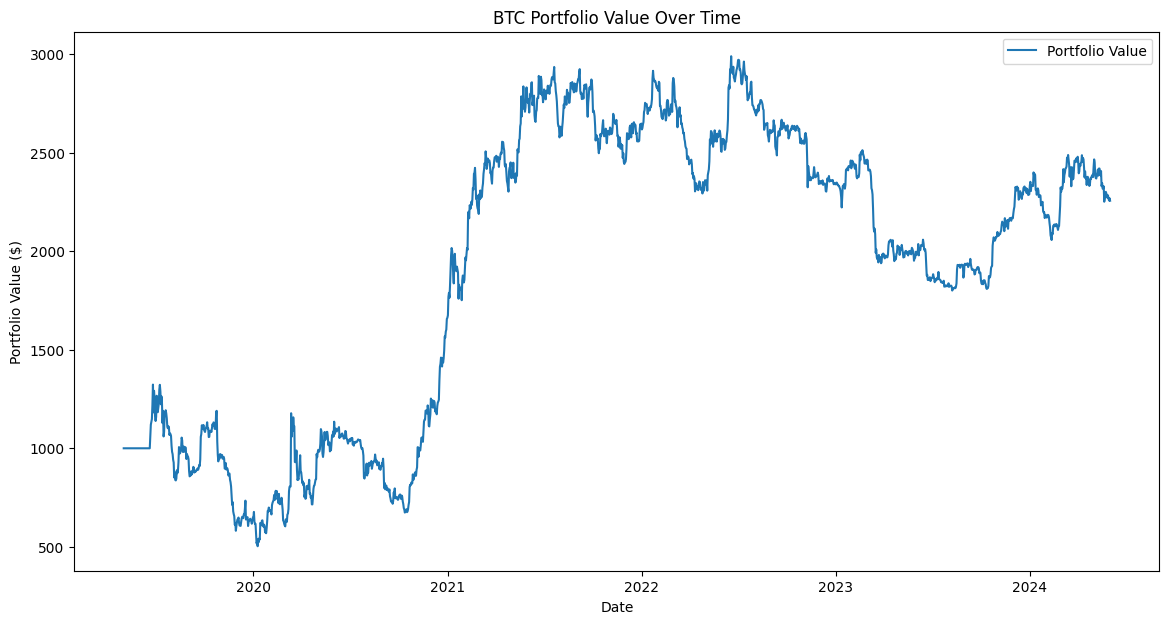

In [14]:
# Plot BTC Portfolio Value
plt.figure(figsize=(14, 7))
plt.plot(btc_data_ma['Date'], btc_data_ma['Portfolio_Value'], label='Portfolio Value')
plt.title('BTC Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

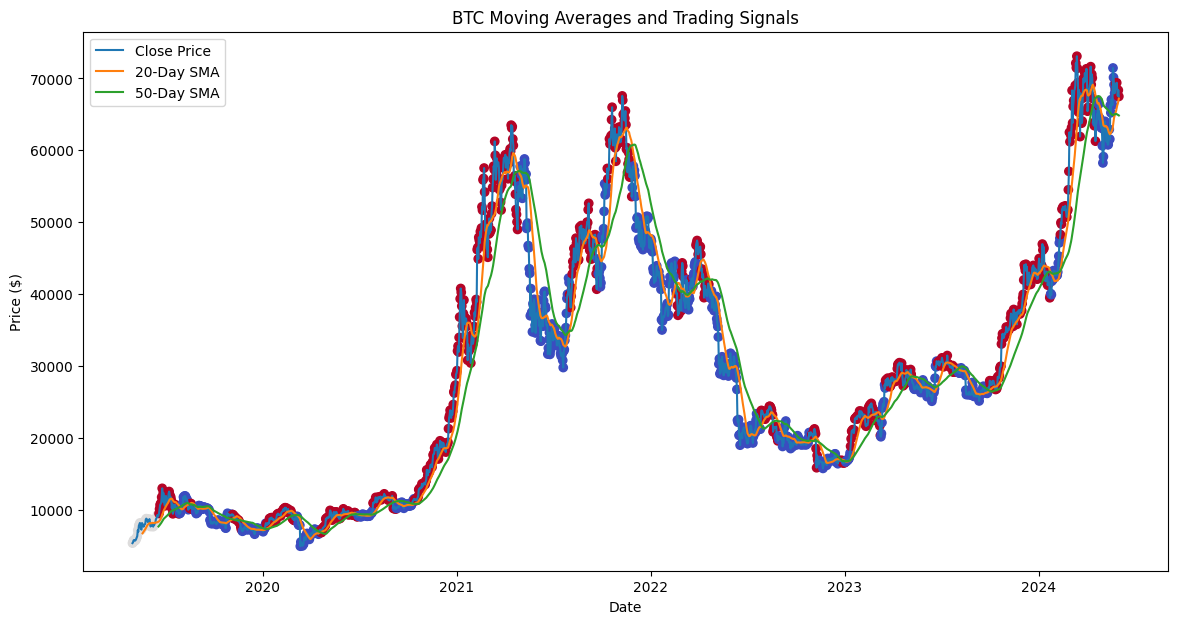

In [15]:
# Plot BTC Moving Averages and Signals
plt.figure(figsize=(14, 7))
plt.plot(btc_data_ma['Date'], btc_data_ma['Close'], label='Close Price')
plt.plot(btc_data_ma['Date'], btc_data_ma['SMA_20'], label='20-Day SMA')
plt.plot(btc_data_ma['Date'], btc_data_ma['SMA_50'], label='50-Day SMA')
plt.scatter(btc_data_ma['Date'], btc_data_ma['Close'], c=btc_data_ma['Signal'], cmap='coolwarm', marker='o')
plt.title('BTC Moving Averages and Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


## ETH Trading Simulation

In [16]:
# Initialize variables for ETH trading simulation
eth_data_ma['Position'] = eth_data_ma['Signal'].shift()
eth_data_ma['Daily_Return'] = eth_data_ma['Close'].pct_change()

# Calculate portfolio value
eth_data_ma['Portfolio_Value'] = initial_capital * (1 + (eth_data_ma['Position'] * eth_data_ma['Daily_Return']).cumsum())

eth_data_ma.tail(25)


,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Signal,Position,Daily_Return,Portfolio_Value
1833,2024-05-07,3062.750977,3129.081299,3003.013672,3006.577148,3006.577148,11743187337,3120.327515,3279.575059,-1,-1.0,-0.018334,3864.870624
1834,2024-05-08,3006.315674,3037.196045,2938.472656,2973.657227,2973.657227,11791662158,3115.708997,3275.895840,-1,-1.0,-0.010949,3875.819926
1835,2024-05-09,2973.971680,3057.958252,2951.223877,3036.020508,3036.020508,10861947179,3114.546094,3266.348389,-1,-1.0,0.020972,3854.848013
1836,2024-05-10,3036.231201,3052.729492,2881.000732,2909.791260,2909.791260,12278653601,3102.154297,3254.684390,-1,-1.0,-0.041577,3896.425218
1837,2024-05-11,2909.845459,2942.178711,2888.083252,2911.602051,2911.602051,6795916454,3090.369971,3246.242671,-1,-1.0,0.000622,3895.802908
1838,2024-05-12,2911.658203,2953.047363,2902.201904,2928.701904,2928.701904,5908941395,3076.722461,3238.084829,-1,-1.0,0.005873,3889.929903
1839,2024-05-13,2928.813965,2994.869141,2865.134521,2949.359619,2949.359619,13352264795,3063.194861,3227.979292,-1,-1.0,0.007054,3882.876364
1840,2024-05-14,2949.213135,2959.546631,2863.545898,2881.157959,2881.157959,12444516140,3050.262500,3213.784775,-1,-1.0,-0.023124,3906.000590
1841,2024-05-15,2881.224609,3041.602295,2864.735352,3037.056641,3037.056641,14666902956,3044.289856,3202.775811,-1,-1.0,0.054110,3851.890859
1842,2024-05-16,3036.014160,3041.807129,2925.087402,2945.131104,2945.131104,13035465176,3035.038171,3191.676128,-1,-1.0,-0.030268,3882.158829


### Plot

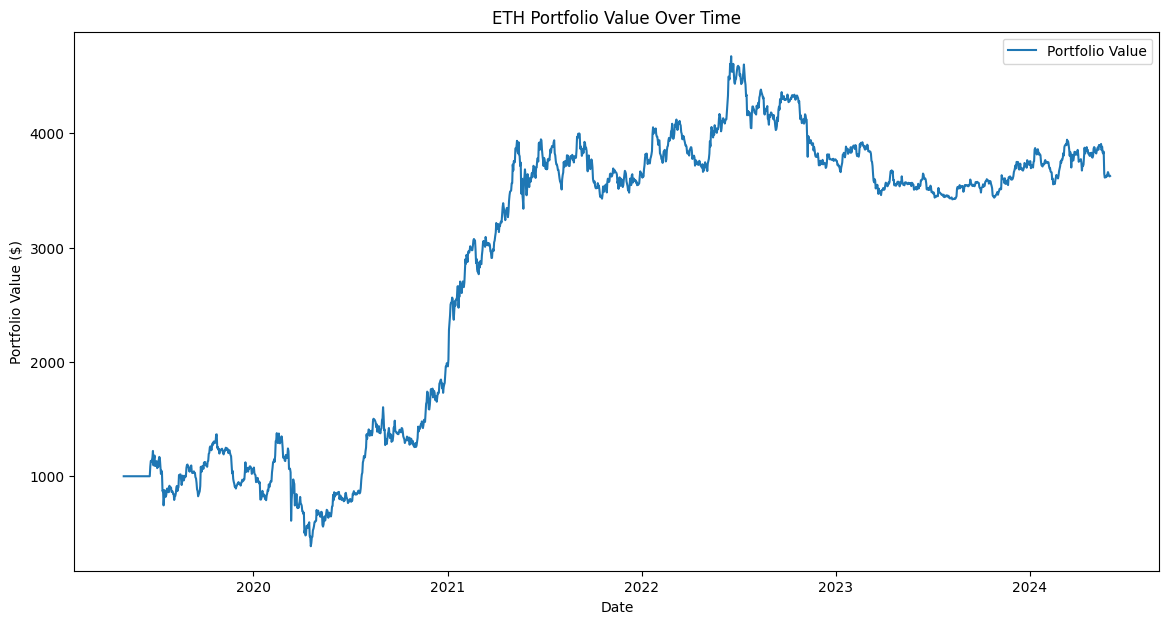

In [17]:
# Plot ETH Portfolio Value
plt.figure(figsize=(14, 7))
plt.plot(eth_data_ma['Date'], eth_data_ma['Portfolio_Value'], label='Portfolio Value')
plt.title('ETH Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

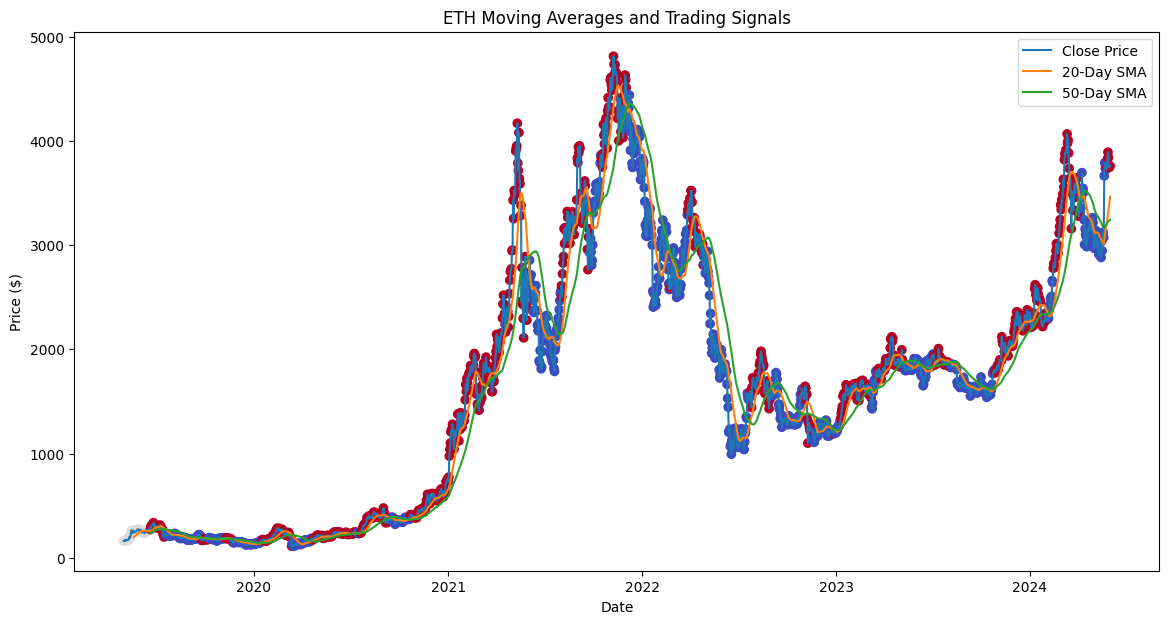

In [18]:
# Plot ETH Moving Averages and Signals
plt.figure(figsize=(14, 7))
plt.plot(eth_data_ma['Date'], eth_data_ma['Close'], label='Close Price')
plt.plot(eth_data_ma['Date'], eth_data_ma['SMA_20'], label='20-Day SMA')
plt.plot(eth_data_ma['Date'], eth_data_ma['SMA_50'], label='50-Day SMA')
plt.scatter(eth_data_ma['Date'], eth_data_ma['Close'], c=eth_data_ma['Signal'], cmap='coolwarm', marker='o')
plt.title('ETH Moving Averages and Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

## Doge Trading Simulation

In [19]:
# Initialize variables
doge_data_ma['Position'] = doge_data_ma['Signal'].shift()
doge_data_ma['Daily_Return'] = doge_data_ma['Close'].pct_change()

# Calculate portfolio value
doge_data_ma['Portfolio_Value'] = initial_capital * (1 + (doge_data_ma['Position'] * doge_data_ma['Daily_Return']).cumsum())

doge_data_ma.head(25)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Signal,Position,Daily_Return,Portfolio_Value
0,2019-05-01,0.002510,0.002551,0.002477,0.002521,0.002521,30316782,NaN,NaN,0,NaN,NaN,NaN
1,2019-05-02,0.002525,0.002656,0.002516,0.002611,0.002611,34506272,NaN,NaN,0,0.0,0.035700,1000.0
2,2019-05-03,0.002610,0.002753,0.002595,0.002721,0.002721,40969776,NaN,NaN,0,0.0,0.042129,1000.0
3,2019-05-04,0.002698,0.002783,0.002608,0.002680,0.002680,39814872,NaN,NaN,0,0.0,-0.015068,1000.0
4,2019-05-05,0.002709,0.002709,0.002622,0.002653,0.002653,33161934,NaN,NaN,0,0.0,-0.010075,1000.0
5,2019-05-06,0.002633,0.002661,0.002515,0.002542,0.002542,37020800,NaN,NaN,0,0.0,-0.041839,1000.0
6,2019-05-07,0.002544,0.002632,0.002536,0.002536,0.002536,38143865,NaN,NaN,0,0.0,-0.002360,1000.0
7,2019-05-08,0.002534,0.002572,0.002505,0.002537,0.002537,32200704,NaN,NaN,0,0.0,0.000394,1000.0
8,2019-05-09,0.002536,0.002554,0.002467,0.002500,0.002500,30720237,NaN,NaN,0,0.0,-0.014584,1000.0
9,2019-05-10,0.002503,0.002559,0.002449,0.002522,0.002522,32480633,NaN,NaN,0,0.0,0.008800,1000.0


### Plot

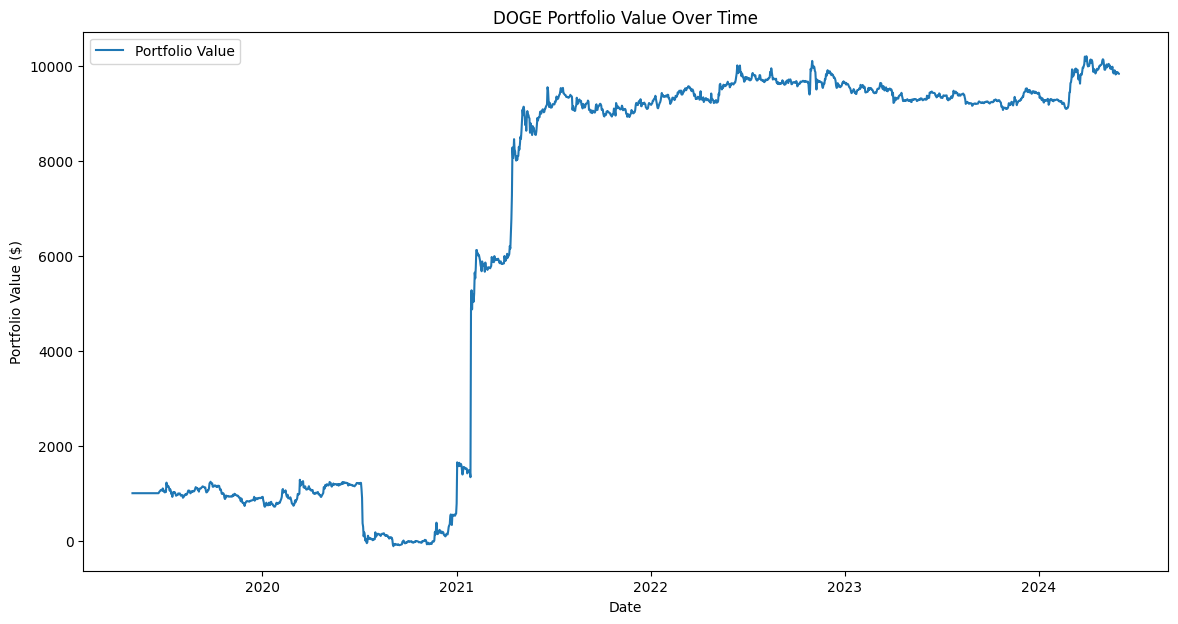

In [20]:
# Plot Doge Portfolio Value
plt.figure(figsize=(14, 7))
plt.plot(doge_data_ma['Date'], doge_data_ma['Portfolio_Value'], label='Portfolio Value')
plt.title('DOGE Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

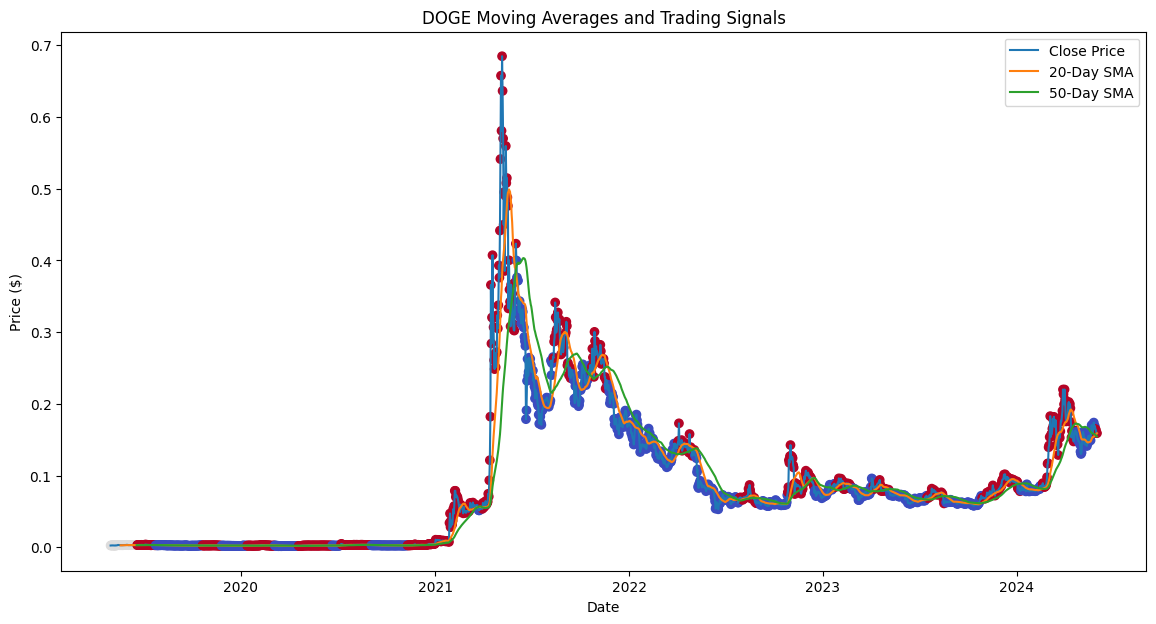

In [21]:
# Plot ETH Moving Averages and Signals
plt.figure(figsize=(14, 7))
plt.plot(doge_data_ma['Date'], doge_data_ma['Close'], label='Close Price')
plt.plot(doge_data_ma['Date'], doge_data_ma['SMA_20'], label='20-Day SMA')
plt.plot(doge_data_ma['Date'], doge_data_ma['SMA_50'], label='50-Day SMA')
plt.scatter(doge_data_ma['Date'], doge_data_ma['Close'], c=doge_data_ma['Signal'], cmap='coolwarm', marker='o')
plt.title('DOGE Moving Averages and Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

##  Pepe Trading Simulation

In [22]:
# Initialize variables
pepe_data_ma['Position'] = pepe_data_ma['Signal'].shift()
pepe_data_ma['Daily_Return'] = pepe_data_ma['Close'].pct_change()

# Calculate portfolio value
pepe_data_ma['Portfolio_Value'] = initial_capital * (1 + (pepe_data_ma['Position'] * pepe_data_ma['Daily_Return']).cumsum())

pepe_data_ma.tail(25)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Signal,Position,Daily_Return,Portfolio_Value
372,2024-05-07,2.622123,2.749714,2.550134,2.575950,2.575950,2148397,4.030831,4.658797,-1,-1.0,-0.017609,7479.477607
373,2024-05-08,2.575950,2.989792,2.070393,2.764499,2.764499,6904282,3.912029,4.684112,-1,-1.0,0.073196,7406.281699
374,2024-05-09,2.764499,3.016323,2.708958,2.998084,2.998084,2703203,3.806014,4.705498,-1,-1.0,0.084495,7321.787185
375,2024-05-10,2.998084,3.036976,2.687535,2.875154,2.875154,2489067,3.679004,4.722229,-1,-1.0,-0.041003,7362.790039
376,2024-05-11,2.875154,3.305618,2.874437,3.275986,3.275986,2260547,3.576488,4.736110,-1,-1.0,0.139412,7223.377680
377,2024-05-12,3.275986,4.354679,3.273693,4.221881,4.221881,3748316,3.510592,4.741268,-1,-1.0,0.288736,6934.641709
378,2024-05-13,4.223743,4.237335,3.514417,3.736420,3.736420,3877261,3.427140,4.721172,-1,-1.0,-0.114987,7049.628607
379,2024-05-14,3.736420,3.772190,3.222712,3.311252,3.311252,1735149,3.361567,4.708329,-1,-1.0,-0.113790,7163.418812
380,2024-05-15,3.311252,3.961339,3.308007,3.961333,3.961333,2288319,3.355544,4.708035,-1,-1.0,0.196325,6967.093978
381,2024-05-16,3.961333,3.978738,3.794322,3.967152,3.967152,1488389,3.373698,4.695800,-1,-1.0,0.001469,6965.625028


### Plot

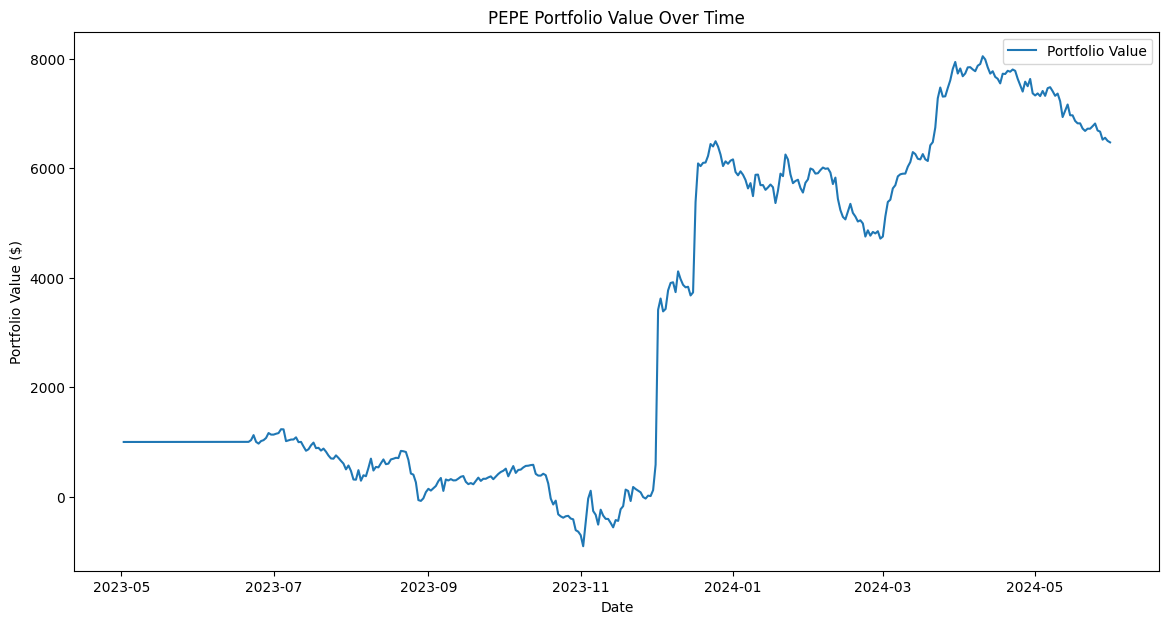

In [23]:
# Plot PEPE Portfolio Value
plt.figure(figsize=(14, 7))
plt.plot(pepe_data_ma['Date'], pepe_data_ma['Portfolio_Value'], label='Portfolio Value')
plt.title('PEPE Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

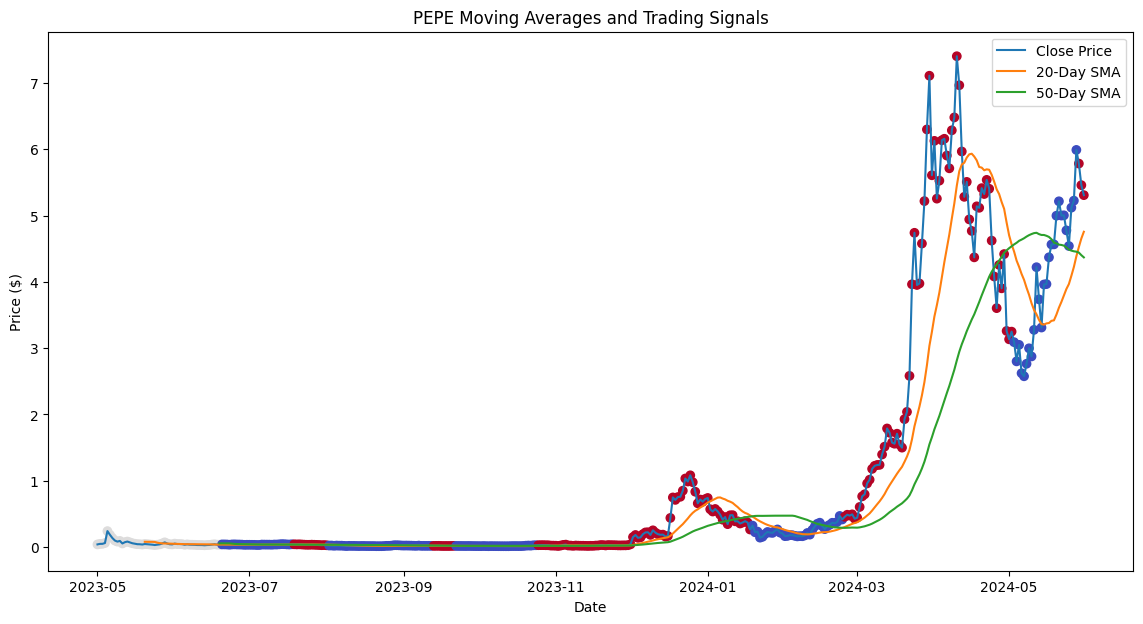

In [24]:
# Plot PEPE Moving Averages and Signals
plt.figure(figsize=(14, 7))
plt.plot(pepe_data_ma['Date'], pepe_data_ma['Close'], label='Close Price')
plt.plot(pepe_data_ma['Date'], pepe_data_ma['SMA_20'], label='20-Day SMA')
plt.plot(pepe_data_ma['Date'], pepe_data_ma['SMA_50'], label='50-Day SMA')
plt.scatter(pepe_data_ma['Date'], pepe_data_ma['Close'], c=pepe_data_ma['Signal'], cmap='coolwarm', marker='o')
plt.title('PEPE Moving Averages and Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

## Shib Trading Simulation

In [25]:
# Initialize variables, filling NaN in 'Position' with 0 to avoid issues
shib_data_ma['Position'] = shib_data_ma['Signal'].shift().fillna(0)
shib_data_ma['Daily_Return'] = shib_data_ma['Close'].pct_change()

# Calculate portfolio value, handling potential infinities
shib_data_ma['Portfolio_Value'] = initial_capital * (1 + (shib_data_ma['Position'] * shib_data_ma['Daily_Return']).cumsum())
shib_data_ma['Portfolio_Value'] = shib_data_ma['Portfolio_Value'].replace([np.inf, -np.inf], np.nan).fillna(method='ffill')

shib_data_ma


<ipython-input-25-9beebc30deea>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  shib_data_ma['Portfolio_Value'] = shib_data_ma['Portfolio_Value'].replace([np.inf, -np.inf], np.nan).fillna(method='ffill')


,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Signal,Position,Daily_Return,Portfolio_Value
0,2021-05-01,0.000002,0.000002,0.000002,0.000002,0.000002,92395224,NaN,NaN,0,0.0,NaN,NaN
1,2021-05-02,0.000002,0.000002,0.000002,0.000002,0.000002,59652130,NaN,NaN,0,0.0,0.000000,1000.000000
2,2021-05-03,0.000002,0.000002,0.000002,0.000002,0.000002,40570107,NaN,NaN,0,0.0,0.000000,1000.000000
3,2021-05-04,0.000002,0.000002,0.000002,0.000002,0.000002,64001867,NaN,NaN,0,0.0,0.000000,1000.000000
4,2021-05-05,0.000002,0.000002,0.000002,0.000002,0.000002,47093779,NaN,NaN,0,0.0,0.000000,1000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,2024-05-27,0.000024,0.000026,0.000024,0.000026,0.000026,896314681,0.000024,0.000024,-1,-1.0,0.083333,2836.175899
1123,2024-05-28,0.000026,0.000027,0.000025,0.000027,0.000027,1425220892,0.000024,0.000024,-1,-1.0,0.038462,2797.714360
1124,2024-05-29,0.000027,0.000029,0.000027,0.000028,0.000028,2117328124,0.000025,0.000024,1,-1.0,0.037037,2760.677323
1125,2024-05-30,0.000028,0.000028,0.000026,0.000026,0.000026,1206206513,0.000025,0.000024,1,1.0,-0.071429,2689.248752


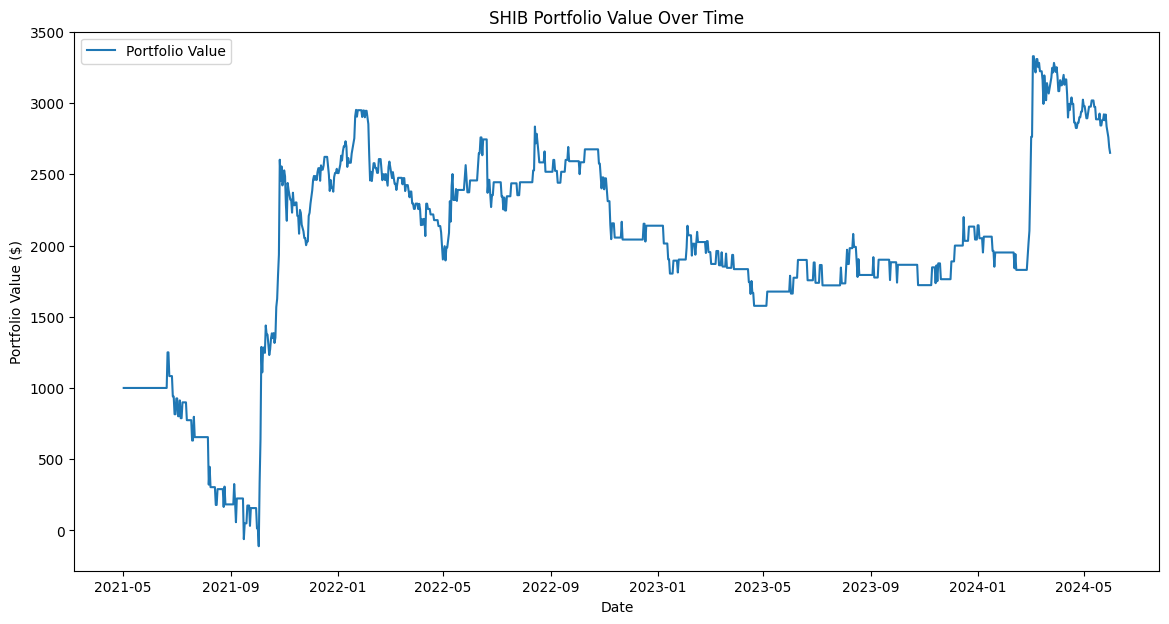

In [26]:
# Plot SHIB Portfolio Value
plt.figure(figsize=(14, 7))
plt.plot(shib_data_ma['Date'], shib_data_ma['Portfolio_Value'], label='Portfolio Value')
plt.title('SHIB Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

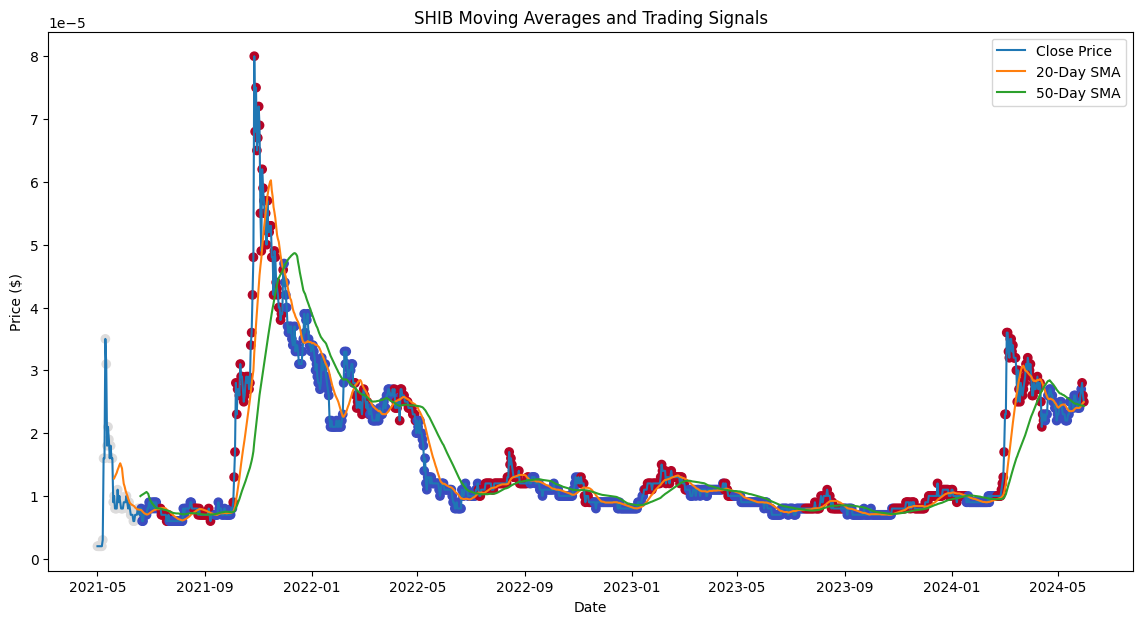

In [27]:
# Plot SHIB Moving Averages and Signals
plt.figure(figsize=(14, 7))
plt.plot(shib_data_ma['Date'], shib_data_ma['Close'], label='Close Price')
plt.plot(shib_data_ma['Date'], shib_data_ma['SMA_20'], label='20-Day SMA')
plt.plot(shib_data_ma['Date'], shib_data_ma['SMA_50'], label='50-Day SMA')
plt.scatter(shib_data_ma['Date'], shib_data_ma['Close'], c=shib_data_ma['Signal'], cmap='coolwarm', marker='o')
plt.title('SHIB Moving Averages and Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

## WIF Trading Simulation

In [28]:
# Initialize variables
wif_data_ma['Position'] = wif_data_ma['Signal'].shift()
wif_data_ma['Daily_Return'] = wif_data_ma['Close'].pct_change()

# Calculate portfolio value
wif_data_ma['Portfolio_Value'] = initial_capital * (1 + (wif_data_ma['Position'] * wif_data_ma['Daily_Return']).cumsum())

wif_data_ma.tail(25)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Signal,Position,Daily_Return,Portfolio_Value
140,2024-05-07,3.360083,3.569598,2.997430,3.004711,3.004711,578526441,2.930597,3.105408,-1,-1.0,-0.105763,4242.118100
141,2024-05-08,3.004721,3.011343,2.741448,2.780767,2.780767,480960456,2.941062,3.114583,-1,-1.0,-0.074531,4316.649061
142,2024-05-09,2.780767,3.182594,2.776971,3.120731,3.120731,421315877,2.950570,3.124905,-1,-1.0,0.122255,4194.393583
143,2024-05-10,3.120738,3.246456,2.908604,2.978562,2.978562,469875446,2.947888,3.138706,-1,-1.0,-0.045556,4239.949896
144,2024-05-11,2.978562,3.140615,2.977815,3.000506,3.000506,271501585,2.951690,3.154224,-1,-1.0,0.007367,4232.582583
145,2024-05-12,3.000504,3.057561,2.944770,2.973233,2.973233,176752011,2.954843,3.168060,-1,-1.0,-0.009089,4241.672050
146,2024-05-13,2.973233,3.335074,2.767109,3.003798,3.003798,659537830,2.954331,3.171730,-1,-1.0,0.010280,4231.391994
147,2024-05-14,3.003798,3.141144,2.776864,2.783011,2.783011,901038331,2.938219,3.173599,-1,-1.0,-0.073503,4304.894607
148,2024-05-15,2.783011,3.083357,2.760918,3.060898,3.060898,953130812,2.933401,3.169683,-1,-1.0,0.099851,4205.043402
149,2024-05-16,3.060966,3.131178,2.759489,2.841596,2.841596,675807342,2.933482,3.165504,-1,-1.0,-0.071646,4276.689697


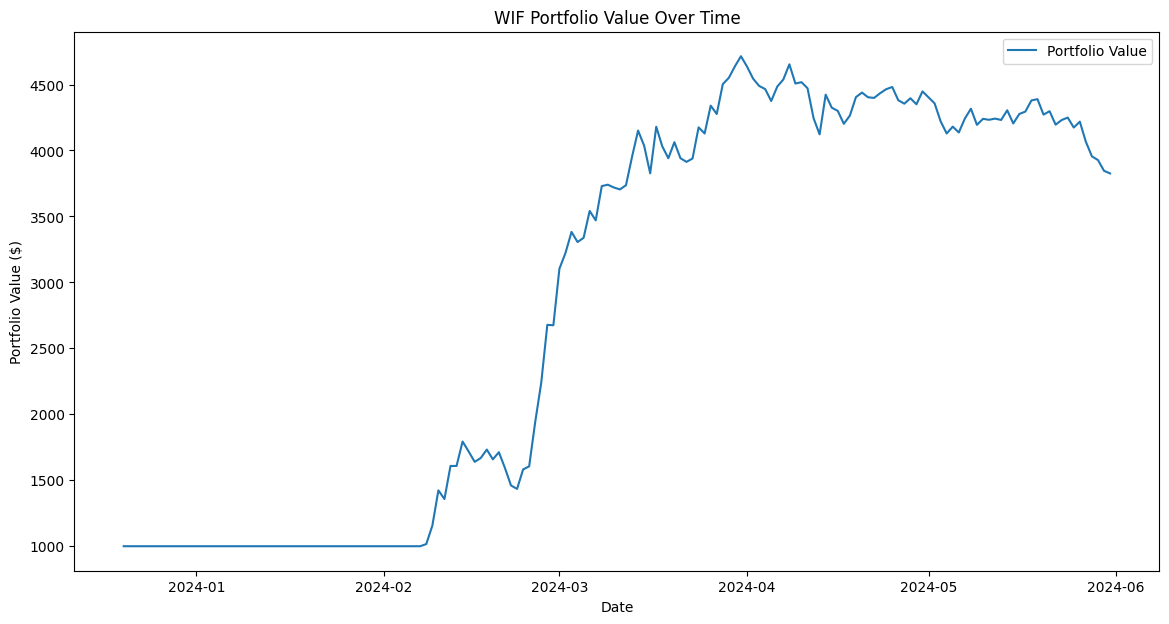

In [29]:
# Plot WIF Portfolio Value
plt.figure(figsize=(14, 7))
plt.plot(wif_data_ma['Date'], wif_data_ma['Portfolio_Value'], label='Portfolio Value')
plt.title('WIF Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

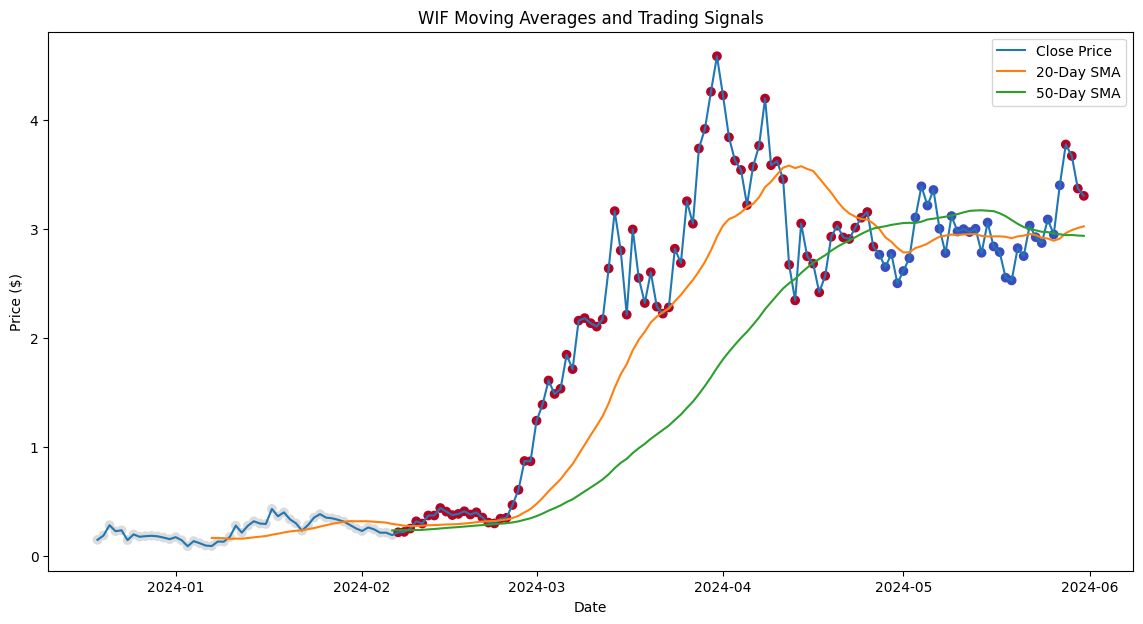

In [30]:
# Plot WIF Moving Averages and Signals
plt.figure(figsize=(14, 7))
plt.plot(wif_data_ma['Date'], wif_data_ma['Close'], label='Close Price')
plt.plot(wif_data_ma['Date'], wif_data_ma['SMA_20'], label='20-Day SMA')
plt.plot(wif_data_ma['Date'], wif_data_ma['SMA_50'], label='50-Day SMA')
plt.scatter(wif_data_ma['Date'], wif_data_ma['Close'], c=wif_data_ma['Signal'], cmap='coolwarm', marker='o')
plt.title('WIF Moving Averages and Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

## 3.Evaluate Performance:

* Calculate the final portfolio value and overall return on investment.

Overall Return on Investment (ROI):

* ROI = (Final Portfolio Value - Initial Capital) / Initial Capital

Sharpe Ratio:
* Sharpe Ratio = (Average Daily Return - Risk-Free Rate) / Standard Deviation of Daily Returns
* Assume the risk-free rate is 0 for simplicity.

Maximum Drawdown:
* The largest peak-to-trough decline in the portfolio value.


In [31]:
def calculate_performance_metrics(data, initial_capital):
    """
    Calculate ROI, Sharpe Ratio, and Maximum Drawdown for the given data.

    Parameters:
    data (pd.DataFrame): The cryptocurrency data with 'Portfolio_Value' and 'Daily_Return' columns.
    initial_capital (float): The initial capital invested.

    Returns:
    tuple: A tuple containing ROI, Sharpe Ratio, and Maximum Drawdown.
    """
    # Calculate ROI
    final_value = data['Portfolio_Value'].iloc[-1]
    roi = (final_value - initial_capital) / initial_capital

    # Calculate Sharpe Ratio
    daily_returns = data['Daily_Return']
    avg_daily_return = daily_returns.mean()
    std_daily_return = daily_returns.std()
    sharpe_ratio = avg_daily_return / std_daily_return

    # Calculate Maximum Drawdown
    cummax = data['Portfolio_Value'].cummax()
    drawdown = data['Portfolio_Value'] / cummax - 1
    max_drawdown = drawdown.min()

    return print('ROI:',roi,'Sharpe Ratio:', sharpe_ratio, 'Maximum Drawdown', max_drawdown)


### BTC Performance Metrics

In [32]:
btc_metrics = calculate_performance_metrics(btc_data_ma, initial_capital)

btc_metrics

ROI: 1.256164942324754 Sharpe Ratio: 0.05661206399547408 Maximum Drawdown -0.6198001680638122


### ETH Performance Metrics

In [33]:
eth_metrics = calculate_performance_metrics(eth_data_ma, initial_capital)
eth_metrics

ROI: 2.625565133062935 Sharpe Ratio: 0.06100895246185091 Maximum Drawdown -0.7181598660203075


### Doge Performance Metrics

In [34]:
doge_metrics = calculate_performance_metrics(doge_data_ma, initial_capital)
doge_metrics

ROI: 8.840781122847925 Sharpe Ratio: 0.050489034233826925 Maximum Drawdown -1.0915453825268426


### Pepe Performance Metrics

In [35]:
pepe_metrics = calculate_performance_metrics(pepe_data_ma, initial_capital)
pepe_metrics

ROI: 5.472034767538 Sharpe Ratio: 0.1202725293023823 Maximum Drawdown -1.7334492374656516


### Shib Performance Metrics

In [36]:
shib_metrics = calculate_performance_metrics(shib_data_ma, initial_capital)
shib_metrics

ROI: 1.6507872135484758 Sharpe Ratio: 0.05083397428889463 Maximum Drawdown -1.0888888888888886


### WIF Performance Metrics

In [37]:
WIF_metrics = calculate_performance_metrics(wif_data_ma, initial_capital)
WIF_metrics

ROI: 2.8259754392611267 Sharpe Ratio: 0.19118717493169238 Maximum Drawdown -0.2003122654977355


## Compare

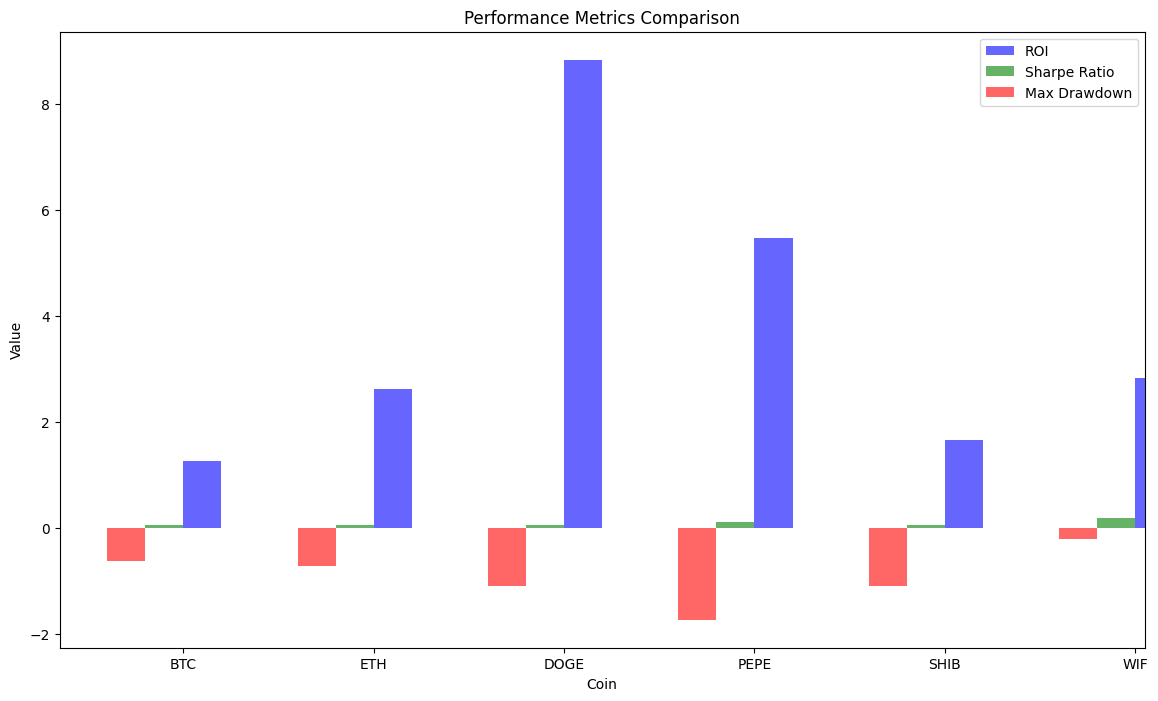

In [38]:
# Creating a DataFrame with the performance metrics
metrics_data = {
    'Coin': ['BTC', 'ETH', 'DOGE', 'PEPE', 'SHIB', 'WIF'],
    'ROI': [1.256164942324754, 2.625565133062935, 8.840781122847925, 5.472034767538, 1.6507872135484758, 2.8259754392611267],
    'Sharpe Ratio': [0.05661206399547408, 0.06100895246185091, 0.050489034233826925, 0.1202725293023823, 0.05083397428889463, 0.19118717493169238],
    'Maximum Drawdown': [-0.6198001680638122, -0.7181598660203075, -1.0915453825268426, -1.7334492374656516, -1.0888888888888886, -0.2003122654977355]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Coin', inplace=True)

fig, ax = plt.subplots(figsize=(14, 8))

# Plot ROI
metrics_df['ROI'].plot(kind='bar', ax=ax, color='blue', alpha=0.6, position=0, width=0.2, label='ROI')

# Plot Sharpe Ratio
metrics_df['Sharpe Ratio'].plot(kind='bar', ax=ax, color='green', alpha=0.6, position=1, width=0.2, label='Sharpe Ratio')

# Plot Maximum Drawdown
metrics_df['Maximum Drawdown'].plot(kind='bar', ax=ax, color='red', alpha=0.6, position=2, width=0.2, label='Max Drawdown')

ax.set_title('Performance Metrics Comparison')
ax.set_ylabel('Value')
ax.legend()
plt.xticks(rotation=0)
plt.show()

**Conclusion**
Based on the analysis of ROI, Sharpe Ratio, and Maximum Drawdown:

Best Performing Overall: WIF

Reasoning: WIF has a good ROI of 2.8260, the highest Sharpe Ratio at 0.1912, and the lowest Maximum Drawdown at -0.2003. This indicates strong performance with good risk-adjusted returns and minimal risk exposure.
High ROI: DOGE

Reasoning: DOGE has the highest ROI at 8.8408, but its Sharpe Ratio is relatively low at 0.0505, and it has a high Maximum Drawdown of -1.0915. This suggests high returns but with significant risk and volatility.
Good Risk-Adjusted Return: PEPE

Reasoning: PEPE has a high ROI of 5.4720 and the second-highest Sharpe Ratio at 0.1203, but it also has a very high Maximum Drawdown of -1.7334, indicating significant risk.
Recommendation
Based on the performance metrics, WIF performs the best overall when considering both returns and risk. It offers a balanced approach with strong returns, good risk-adjusted performance, and minimal drawdown, making it a more stable and attractive option compared to the other cryptocurrencies analyzed.

# Incorporating News Events

In [39]:
# Define the major events with their impacts
major_events = {
    "2019-05-07": ("Binance Hack: 7,000 BTC stolen worth $40.7 million", "negative"),
    "2019-09-23": ("Bakkt Launches Bitcoin Futures Contracts", "positive"),
    "2020-03-12": ("Crypto Market Crash: Bitcoin drops 50% due to COVID-19", "negative"),
    "2020-10-21": ("PayPal Announces Support for Cryptocurrency Transactions", "positive"),
    "2021-01-08": ("Bitcoin Surpasses $40,000 for the First Time", "positive"),
    "2021-05-12": ("Tesla Stops Accepting Bitcoin Payments", "negative"),
    "2022-03-15": ("Regulatory Announcement on Crypto Taxation in the U.S.", "negative"),
    "2022-09-15": ("Ethereum Merge: Transition from Proof of Work to Proof of Stake", "positive"),
    "2022-11-08": ("FTX Exchange Collapse", "negative"),
    "2023-06-01": ("Bitcoin ETFs Approved in Several Regions", "positive"),
    "2023-12-10": ("Rise of DeFi and NFTs: Major projects gain traction", "positive"),
    "2024-01-01": ("First Bitcoin ETF Launched in the U.S.", "positive"),
    "2024-04-15": ("Blockchain Life 2024: Major Event in Dubai", "positive"),
    "2024-05-29": ("Consensus 2024: Major Crypto Conference in Austin, Texas", "positive")
}


In [40]:
def add_event_data(data, major_events):
    """
    Add event data to the BTC dataset.

    Parameters:
    btc_data_cl (pd.DataFrame): The BTC dataset with a 'Date' column.
    major_events (dict): Dictionary of major events with date as key and a tuple of (description, impact) as value.

    Returns:
    pd.DataFrame: BTC dataset with 'Event' and 'Impact' columns added.
    """
    # Convert event dates to pandas datetime
    event_dates = {pd.to_datetime(date): impact for date, impact in major_events.items()}

    # Add a new column for events in
    data['Event'] = data['Date'].apply(lambda x: event_dates.get(pd.to_datetime(x), (None, None))[0])
    data['Impact'] = data['Date'].apply(lambda x: event_dates.get(pd.to_datetime(x), (None, None))[1])

    return data

In [41]:

def analyze_event_impacts(data, major_events, days_before=1, days_after=1):
    """
    Analyze the impact of events on BTC prices.

    Parameters:
    data (pd.DataFrame): The BTC dataset with a 'Date' column and 'Close' prices.
    major_events (dict): Dictionary of major events with date as key and a tuple of (description, impact) as value.
    days_before (int): Number of days before the event to consider for the price change calculation.
    days_after (int): Number of days after the event to consider for the price change calculation.

    Returns:
    pd.DataFrame: DataFrame with event dates, descriptions, impacts, and price change percentages.
    """
    # Convert event dates to pandas datetime
    event_dates = {pd.to_datetime(date): impact for date, impact in major_events.items()}

    # Ensure Date is in datetime format
    data['Date'] = pd.to_datetime(data['Date'])

    # Function to calculate price change around events
    def calculate_price_change(data, event_date, days_before, days_after):
        before_event = data[(data['Date'] >= event_date - pd.Timedelta(days=days_before)) &
                            (data['Date'] < event_date)]
        after_event = data[(data['Date'] > event_date) &
                           (data['Date'] <= event_date + pd.Timedelta(days=days_after))]
        if not before_event.empty and not after_event.empty:
            price_change = (after_event['Close'].iloc[-1] - before_event['Close'].iloc[0]) / before_event['Close'].iloc[0] * 100
            return price_change
        return None

    # Calculate price changes for each event
    event_impact_analysis = []

    for event_date, (event_desc, impact) in event_dates.items():
        price_change = calculate_price_change(data, event_date, days_before, days_after)
        event_impact_analysis.append((event_date, event_desc, impact, price_change))

    # Create a DataFrame to display the analysis
    event_impact_df = pd.DataFrame(event_impact_analysis, columns=['Date', 'Event Description', 'Impact', 'Price Change (%)'])

    return event_impact_df

## Reflecting the changes on the data


#### BTC with news

In [42]:
btc_data_news = add_event_data(btc_data_cl.copy(), major_events)
btc_data_news.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Signal,Position,Daily_Return,Portfolio_Value,Event,Impact
0,2019-05-01,5350.914551,5418.003906,5347.645996,5402.697266,5402.697266,13679528236,NaN,NaN,0,NaN,NaN,NaN,None,None
1,2019-05-02,5402.422852,5522.262695,5394.217285,5505.283691,5505.283691,14644460907,NaN,NaN,0,0.0,0.018988,1000.0,None,None
2,2019-05-03,5505.552246,5865.881836,5490.201660,5768.289551,5768.289551,18720780006,NaN,NaN,0,0.0,0.047773,1000.0,None,None
3,2019-05-04,5769.202637,5886.893555,5645.469238,5831.167480,5831.167480,17567780766,NaN,NaN,0,0.0,0.010901,1000.0,None,None
4,2019-05-05,5831.068359,5833.862793,5708.035156,5795.708496,5795.708496,14808830723,NaN,NaN,0,0.0,-0.006081,1000.0,None,None
5,2019-05-06,5791.693359,5802.957520,5653.687500,5746.807129,5746.807129,15737171804,NaN,NaN,0,0.0,-0.008438,1000.0,None,None
6,2019-05-07,5745.599121,5988.178223,5741.395996,5829.501465,5829.501465,18026409033,NaN,NaN,0,0.0,0.014390,1000.0,"Binance Hack: 7,000 BTC stolen worth $40.7 mil...",negative
7,2019-05-08,5849.481445,5989.980957,5794.715820,5982.457520,5982.457520,15320605300,NaN,NaN,0,0.0,0.026238,1000.0,None,None
8,2019-05-09,5982.316406,6183.039063,5982.316406,6174.528809,6174.528809,16784645411,NaN,NaN,0,0.0,0.032106,1000.0,None,None
9,2019-05-10,6175.822754,6434.617676,6161.519043,6378.849121,6378.849121,19419875368,NaN,NaN,0,0.0,0.033091,1000.0,None,None


In [43]:
event_impact_btc = analyze_event_impacts(btc_data_news, major_events)
event_impact_btc

,Date,Event Description,Impact,Price Change (%)
0,2019-05-07,"Binance Hack: 7,000 BTC stolen worth $40.7 mil...",negative,4.100545
1,2019-09-23,Bakkt Launches Bitcoin Futures Contracts,positive,-14.396918
2,2020-03-12,Crypto Market Crash: Bitcoin drops 50% due to ...,negative,-29.675079
3,2020-10-21,PayPal Announces Support for Cryptocurrency Tr...,positive,8.807713
4,2021-01-08,"Bitcoin Surpasses $40,000 for the First Time",positive,2.244045
5,2021-05-12,Tesla Stops Accepting Bitcoin Payments,negative,-12.324196
6,2022-03-15,Regulatory Announcement on Crypto Taxation in ...,negative,3.723964
7,2022-09-15,Ethereum Merge: Transition from Proof of Work ...,positive,-2.314628
8,2022-11-08,FTX Exchange Collapse,negative,-22.919372
9,2023-06-01,Bitcoin ETFs Approved in Several Regions,positive,0.109963


#### ETH with news

In [44]:
eth_data_news = add_event_data(eth_data_cl.copy(), major_events)
event_impact_eth = analyze_event_impacts(eth_data_news, major_events)
event_impact_eth

,Date,Event Description,Impact,Price Change (%)
0,2019-05-07,"Binance Hack: 7,000 BTC stolen worth $40.7 mil...",negative,-0.987556
1,2019-09-23,Bakkt Launches Bitcoin Futures Contracts,positive,-20.532071
2,2020-03-12,Crypto Market Crash: Bitcoin drops 50% due to ...,negative,-31.645293
3,2020-10-21,PayPal Announces Support for Cryptocurrency Tr...,positive,12.092012
4,2021-01-08,"Bitcoin Surpasses $40,000 for the First Time",positive,4.519879
5,2021-05-12,Tesla Stops Accepting Bitcoin Payments,negative,-10.879953
6,2022-03-15,Regulatory Announcement on Crypto Taxation in ...,negative,7.000421
7,2022-09-15,Ethereum Merge: Transition from Proof of Work ...,positive,-12.375387
8,2022-11-08,FTX Exchange Collapse,negative,-29.862559
9,2023-06-01,Bitcoin ETFs Approved in Several Regions,positive,1.767545


## Compare

 Calculate Price Changes on the Event Day and Following Days

In [45]:
def add_price_change_columns(data, days_list=[1, 3, 5, 7, 10]):
    for days in days_list:
        data[f'Price_Change_{days}D'] = data['Close'].pct_change(periods=days) * 100
    return data

# Add price change columns to the original price data
btc_data_news = add_price_change_columns(btc_data_news)
eth_data_news = add_price_change_columns(eth_data_news)

# Merge Event Impact Data with Price Data
btc_merged_data = btc_data_news.merge(event_impact_btc, on='Date', how='left', suffixes=('', '_Event'))
eth_merged_data = eth_data_news.merge(event_impact_eth, on='Date', how='left', suffixes=('', '_Event'))


Analyze the Impact of News Events

In [46]:
def analyze_news_impact(data, days_list=[1, 3, 5, 7, 10]):
    results = {}

    for days in days_list:
        positive_events = data[data['Impact'] == 'positive']
        negative_events = data[data['Impact'] == 'negative']

        avg_positive_change = positive_events[f'Price_Change_{days}D'].mean()
        avg_negative_change = negative_events[f'Price_Change_{days}D'].mean()

        results[f'Average Price Change {days}D'] = {
            'Positive Events': avg_positive_change,
            'Negative Events': avg_negative_change
        }

    return results

# Analyze the impact of news events on BTC and ETH
btc_news_impact_analysis = analyze_news_impact(btc_merged_data)
eth_news_impact_analysis = analyze_news_impact(eth_merged_data)

btc_news_impact_analysis

{'Average Price Change 1D': {'Positive Events': 0.41882558503263145,
  'Negative Events': -11.977052883269604},
 'Average Price Change 3D': {'Positive Events': 1.226132664498213,
  'Negative Events': -12.930833483717086},
 'Average Price Change 5D': {'Positive Events': 1.473498252106114,
  'Negative Events': -12.227107273999858},
 'Average Price Change 7D': {'Positive Events': 5.118927659023872,
  'Negative Events': -16.898202818274424},
 'Average Price Change 10D': {'Positive Events': 7.433981256379099,
  'Negative Events': -17.065488464324424}}

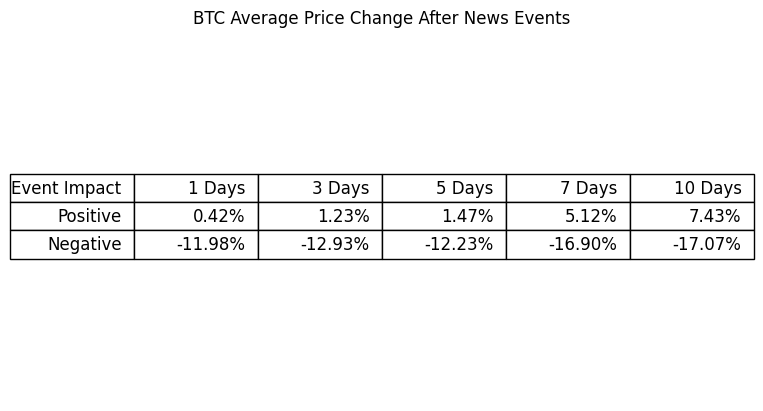

In [47]:
# Extract data for plotting
days = list(btc_news_impact_analysis['Average Price Change 1D'].keys())
positive_changes = [btc_news_impact_analysis[f'Average Price Change {d}D']['Positive Events'] for d in [1, 3, 5, 7, 10]]
negative_changes = [btc_news_impact_analysis[f'Average Price Change {d}D']['Negative Events'] for d in [1, 3, 5, 7, 10]]

# Create table data
table_data = [
    ['Event Impact'] + [f'{d} Days' for d in [1, 3, 5, 7, 10]],
    ['Positive'] + [f'{change:.2f}%' if change is not None else 'N/A' for change in positive_changes],
    ['Negative'] + [f'{change:.2f}%' if change is not None else 'N/A' for change in negative_changes]
]

# Plot the table
fig, ax = plt.subplots()
table = ax.table(cellText=table_data, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.7)
ax.axis('off')
plt.title('BTC Average Price Change After News Events')
plt.show()


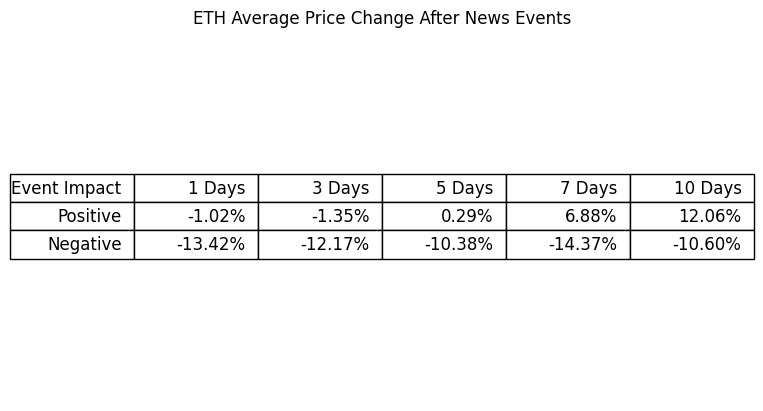

In [48]:
# Extract data for plotting
days = list(eth_news_impact_analysis['Average Price Change 1D'].keys())
positive_changes = [eth_news_impact_analysis[f'Average Price Change {d}D']['Positive Events'] for d in [1, 3, 5, 7, 10]]
negative_changes = [eth_news_impact_analysis[f'Average Price Change {d}D']['Negative Events'] for d in [1, 3, 5, 7, 10]]

# Create table data
table_data = [
    ['Event Impact'] + [f'{d} Days' for d in [1, 3, 5, 7, 10]],
    ['Positive'] + [f'{change:.2f}%' if change is not None else 'N/A' for change in positive_changes],
    ['Negative'] + [f'{change:.2f}%' if change is not None else 'N/A' for change in negative_changes]
]

# Plot the table
fig, ax = plt.subplots()
table = ax.table(cellText=table_data, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.5, 1.7)
ax.axis('off')
plt.title('ETH Average Price Change After News Events')
plt.show()


BTC (Bitcoin) Impact Analysis

Positive Events:

1 Day: Average price change of +0.42%
3 Days: Average price change of +1.23%
5 Days: Average price change of +1.47%
7 Days: Average price change of +5.12%
10 Days: Average price change of +7.43%

The positive events for BTC led to gradual price increases over the 10-day period. The average price change was modest initially but became more significant over time, reaching over 7% after 10 days. This indicates that positive news events have a lasting positive impact on BTC prices, which tend to appreciate as the market absorbs the news.

Negative Events:

1 Day: Average price change of -11.98%
3 Days: Average price change of -12.93%
5 Days: Average price change of -12.23%
7 Days: Average price change of -16.90%
10 Days: Average price change of -17.07%

The negative events for BTC caused immediate and significant price drops. The average price change was around -12% on the first day and increased to over -17% after 10 days. This demonstrates that negative news events cause substantial and persistent declines in BTC prices, with the impact deepening over time.

ETH (Ethereum) Impact Analysis

Positive Events:

1 Day: Average price change of -1.02%
3 Days: Average price change of -1.35%
5 Days: Average price change of +0.29%
7 Days: Average price change of +6.88%
10 Days: Average price change of +12.06%

For ETH, positive news events initially had a slightly negative impact on prices in the short term (1-3 days), possibly due to market adjustments or profit-taking. However, from day 5 onwards, the impact turned positive, with a significant increase of around 12% after 10 days. This indicates that positive news has a delayed but strong positive effect on ETH prices.

Negative Events:

1 Day: Average price change of -13.42%
3 Days: Average price change of -12.17%
5 Days: Average price change of -10.38%
7 Days: Average price change of -14.37%
10 Days: Average price change of -10.60%

Negative events had an immediate and significant negative impact on ETH prices, similar to BTC. However, the magnitude of the decline slightly reduced over time, with the average price change decreasing from -13.42% on the first day to -10.60% after 10 days. This suggests that while negative news leads to immediate price drops, the market starts to stabilize after a week.

Summary

Positive Events: Both BTC and ETH benefit from positive news events, but the effect is more pronounced and quicker for BTC, while ETH sees a delayed positive impact.
Negative Events: Both cryptocurrencies experience significant and immediate price drops following negative news, with BTC's decline deepening over time and ETH's decline showing some stabilization after a week.

# Incorporating Mathematical Models (Hidden Markov Models)

* State 0: Typically represents a "Bull Market" with increasing prices.
* State 1: Typically represents a "Bear Market" with decreasing prices.
* State 2: Typically represents a "Stagnant Market" with prices fluctuating without a clear trend.

#### Function

In [49]:
def analyze_crypto_market(data, coin_name):
    # Calculate log returns
    data['Log Returns'] = np.log(data['Close'] / data['Close'].shift(1))
    data = data.dropna()

    # Helper function to calculate the Gaussian probability using log-sum-exp trick
    def log_gaussian_prob(x, mean, var):
        return -0.5 * (np.log(2 * np.pi * var) + (x - mean) ** 2 / var)

    # E-step: Calculate the expected state probabilities with log-sum-exp trick
    def e_step(obs, init_prob, trans_prob, means, variances):
        n_samples = len(obs)
        n_states = len(init_prob)

        # Forward step with log-sum-exp
        log_alpha = np.zeros((n_samples, n_states))
        log_alpha[0, :] = np.log(init_prob) + [log_gaussian_prob(obs[0], means[s], variances[s]) for s in range(n_states)]

        for t in range(1, n_samples):
            for s in range(n_states):
                log_alpha[t, s] = log_gaussian_prob(obs[t], means[s], variances[s]) + np.logaddexp.reduce(log_alpha[t-1, :] + np.log(trans_prob[:, s]))

        # Backward step with log-sum-exp
        log_beta = np.zeros((n_samples, n_states))
        log_beta[-1, :] = 0

        for t in range(n_samples-2, -1, -1):
            for s in range(n_states):
                log_beta[t, s] = np.logaddexp.reduce(log_beta[t+1, :] + np.log(trans_prob[s, :]) + [log_gaussian_prob(obs[t+1], means[s_next], variances[s_next]) for s_next in range(n_states)])

        # Calculate log gamma (state probabilities)
        log_gamma = log_alpha + log_beta
        log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)

        gamma = np.exp(log_gamma)

        # Calculate log xi (state transition probabilities)
        log_xi = np.zeros((n_samples-1, n_states, n_states))
        for t in range(n_samples-1):
            for i in range(n_states):
                log_xi[t, i, :] = log_alpha[t, i] + np.log(trans_prob[i, :]) + [log_gaussian_prob(obs[t+1], means[s_next], variances[s_next]) for s_next in range(n_states)] + log_beta[t+1, :]
            log_xi[t, :, :] -= np.logaddexp.reduce(log_xi[t, :, :].ravel())

        xi = np.exp(log_xi)

        return gamma, xi

    # M-step: Update the parameters with regularization
    def m_step(obs, gamma, xi, epsilon=1e-6):
        n_samples = len(obs)
        n_states = gamma.shape[1]

        # Update initial probabilities
        init_prob = gamma[0, :]

        # Update transition probabilities
        trans_prob = np.sum(xi, axis=0) / np.sum(gamma[:-1, :], axis=0)[:, None]

        # Update means and variances with regularization
        means = np.sum(gamma * obs[:, None], axis=0) / np.sum(gamma, axis=0)
        variances = np.sum(gamma * (obs[:, None] - means) ** 2, axis=0) / np.sum(gamma, axis=0) + epsilon

        return init_prob, trans_prob, means, variances

    # Iterate until convergence with better initialization
    def train_hmm(obs, n_states=3, n_iter=100):
        # Initialize means using k-means clustering
        kmeans = KMeans(n_clusters=n_states).fit(obs.reshape(-1, 1))
        means = kmeans.cluster_centers_.flatten()
        variances = np.var(obs) * np.ones(n_states)

        # Randomly initialize other parameters
        init_prob = np.array([1.0 / n_states] * n_states)
        trans_prob = np.random.rand(n_states, n_states)
        trans_prob = trans_prob / trans_prob.sum(axis=1)[:, None]

        for _ in range(n_iter):
            gamma, xi = e_step(obs, init_prob, trans_prob, means, variances)
            init_prob, trans_prob, means, variances = m_step(obs, gamma, xi)

        return init_prob, trans_prob, means, variances

    # Viterbi algorithm to find the most probable state sequence
    def viterbi(obs, init_prob, trans_prob, means, variances):
        n_samples = len(obs)
        n_states = len(init_prob)

        # Initialize the Viterbi matrix and the backpointer matrix
        V = np.zeros((n_states, n_samples))
        backpointer = np.zeros((n_states, n_samples), dtype=int)

        # Initialize the first column of V
        for s in range(n_states):
            V[s, 0] = np.log(init_prob[s]) + log_gaussian_prob(obs[0], means[s], variances[s])

        # Fill in the Viterbi matrix
        for t in range(1, n_samples):
            for s in range(n_states):
                trans_probs = V[:, t-1] + np.log(trans_prob[:, s])
                max_trans_prob = np.max(trans_probs)
                V[s, t] = max_trans_prob + log_gaussian_prob(obs[t], means[s], variances[s])
                backpointer[s, t] = np.argmax(trans_probs)

        # Backtrack to find the most probable state sequence
        best_path = np.zeros(n_samples, dtype=int)
        best_path[-1] = np.argmax(V[:, -1])
        for t in range(n_samples-2, -1, -1):
            best_path[t] = backpointer[best_path[t+1], t+1]

        return best_path

    # Train the HMM using the refined parameters
    obs = data['Log Returns'].values
    init_prob, trans_prob, means, variances = train_hmm(obs)

    # Use the Viterbi algorithm with the refined parameters
    hidden_states = viterbi(obs, init_prob, trans_prob, means, variances)

    # Add the hidden states to the dataframe
    data['State'] = hidden_states

    # Visualize the results
    plt.figure(figsize=(15, 8))
    plt.plot(data['Date'], data['Close'], label='Price')
    for i in range(3):
        state = (hidden_states == i)
        plt.plot(data['Date'][state], data['Close'][state], '.', label=f'State {i}')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Hidden Markov Model - Hidden States for {coin_name}')
    plt.show()

    # Adjust strategy based on the latest predicted state
    latest_state = hidden_states[-1]
    if latest_state == 0:
        strategy = "Bull Market: Increase position size or hold longer."
    elif latest_state == 1:
        strategy = "Bear Market: Decrease position size or exit quickly."
    else:
        strategy = "Stagnant Market: Maintain a neutral position or reduce trading frequency."

    print(strategy)
    return data, strategy



### Bitcoin

In [50]:
btc_data_cl

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_20,SMA_50,Signal,Position,Daily_Return,Portfolio_Value
0,2019-05-01,5350.914551,5418.003906,5347.645996,5402.697266,5402.697266,13679528236,NaN,NaN,0,NaN,NaN,NaN
1,2019-05-02,5402.422852,5522.262695,5394.217285,5505.283691,5505.283691,14644460907,NaN,NaN,0,0.0,0.018988,1000.000000
2,2019-05-03,5505.552246,5865.881836,5490.201660,5768.289551,5768.289551,18720780006,NaN,NaN,0,0.0,0.047773,1000.000000
3,2019-05-04,5769.202637,5886.893555,5645.469238,5831.167480,5831.167480,17567780766,NaN,NaN,0,0.0,0.010901,1000.000000
4,2019-05-05,5831.068359,5833.862793,5708.035156,5795.708496,5795.708496,14808830723,NaN,NaN,0,0.0,-0.006081,1000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,2024-05-27,68512.179688,70597.882813,68232.500000,69394.554688,69394.554688,25870990717,65891.923242,65045.229063,1,1.0,0.012792,2283.641075
1854,2024-05-28,69392.195313,69514.640625,67227.156250,68296.218750,68296.218750,32722265965,66247.337110,64978.526250,1,1.0,-0.015827,2267.813667
1855,2024-05-29,68296.351563,68852.460938,67101.492188,67578.093750,67578.093750,26707072906,66473.743750,64947.307813,1,1.0,-0.010515,2257.298809
1856,2024-05-30,67576.085938,69500.539063,67118.078125,68364.992188,68364.992188,29509712534,66852.354492,64902.850000,1,1.0,0.011644,2268.943092


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-49-861533d4c108>:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['State'] = hidden_states


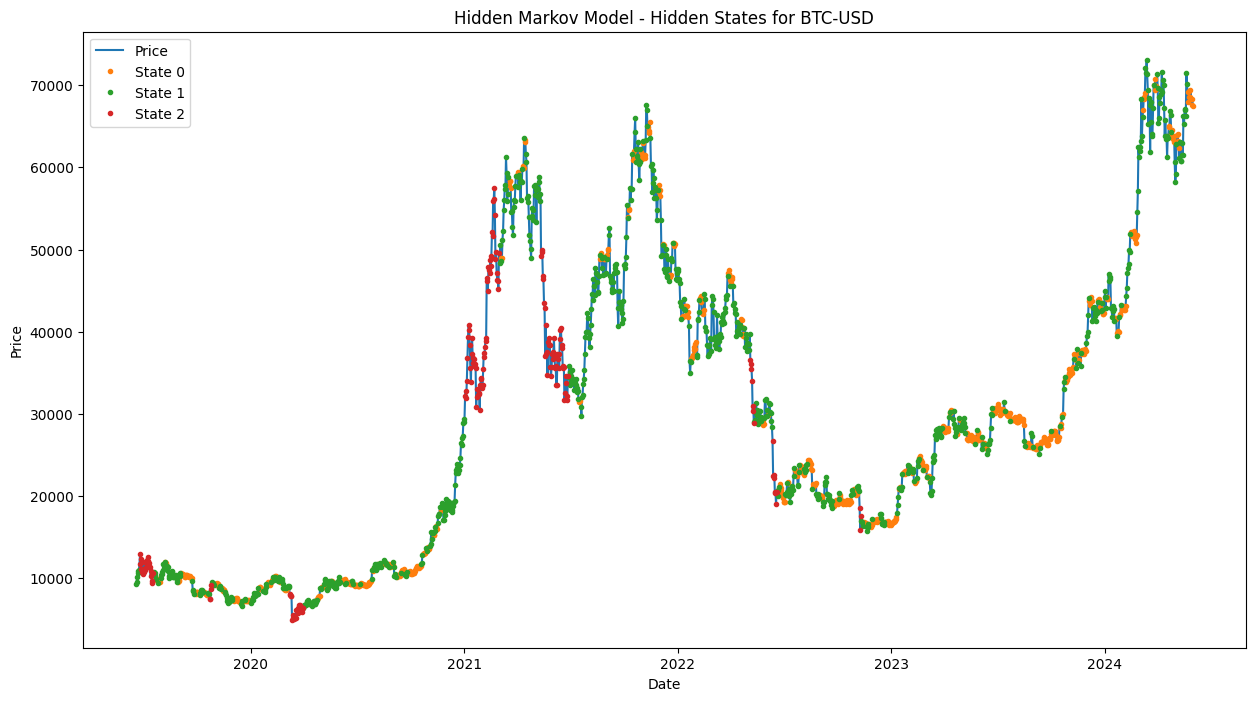

Bull Market: Increase position size or hold longer.


In [51]:

processed_data_btc, suggested_strategy_btc = analyze_crypto_market(btc_data_cl, 'BTC-USD')

### ETH

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-49-861533d4c108>:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['State'] = hidden_states


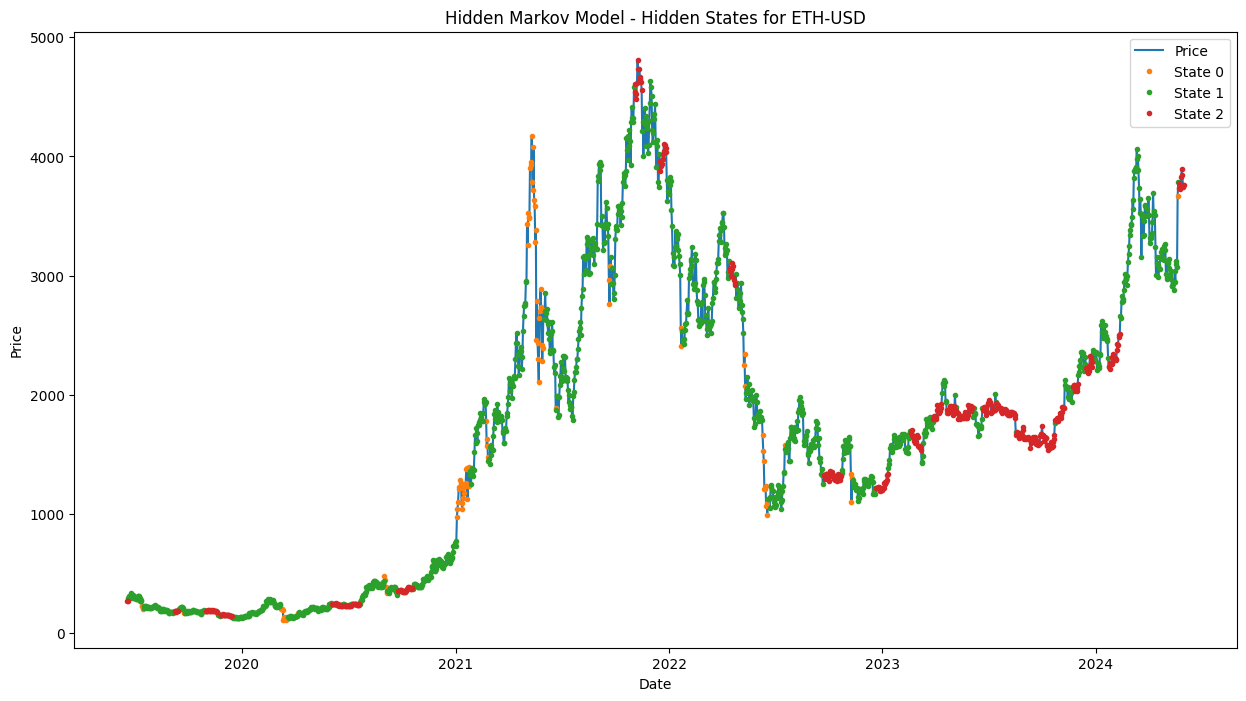

Stagnant Market: Maintain a neutral position or reduce trading frequency.


In [52]:
processed_data_eth, suggested_strategy_eth = analyze_crypto_market(eth_data_cl, "ETH-USD")


### Doge

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-49-861533d4c108>:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['State'] = hidden_states


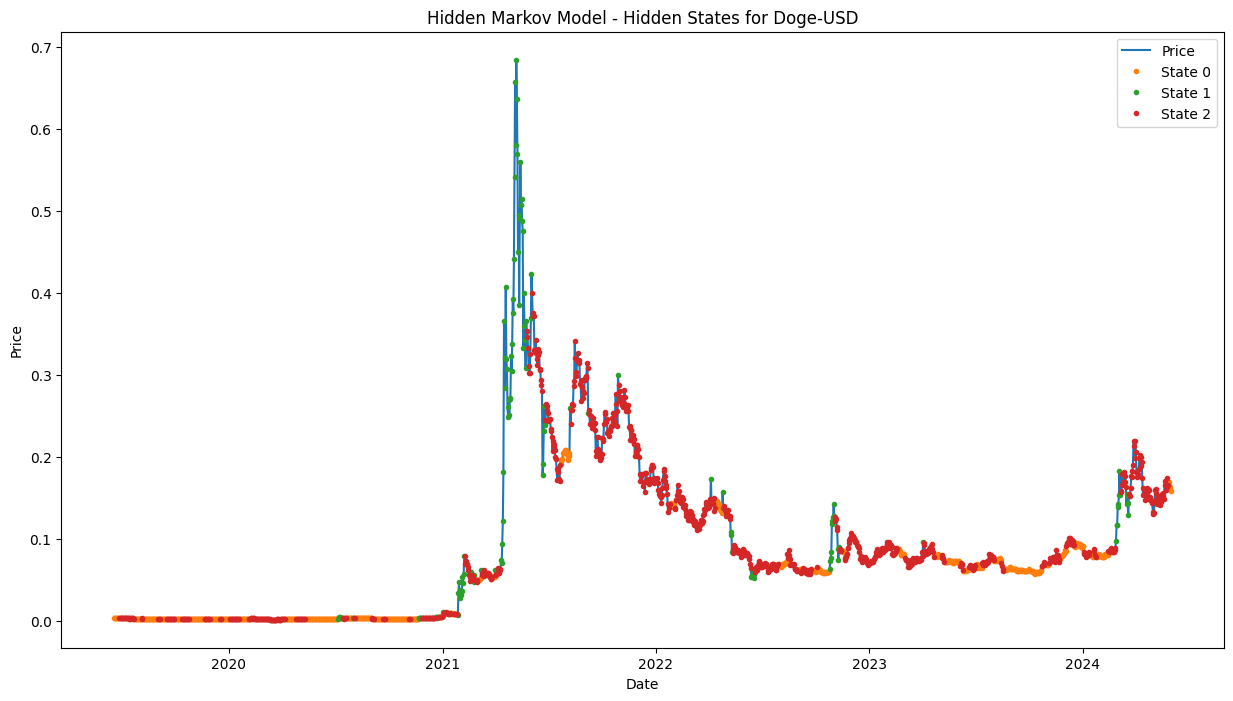

Bull Market: Increase position size or hold longer.


In [53]:
processed_data_doge, suggested_strategy_doge = analyze_crypto_market(doge_data_cl, "Doge-USD")


### PEPE

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-49-861533d4c108>:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['State'] = hidden_states


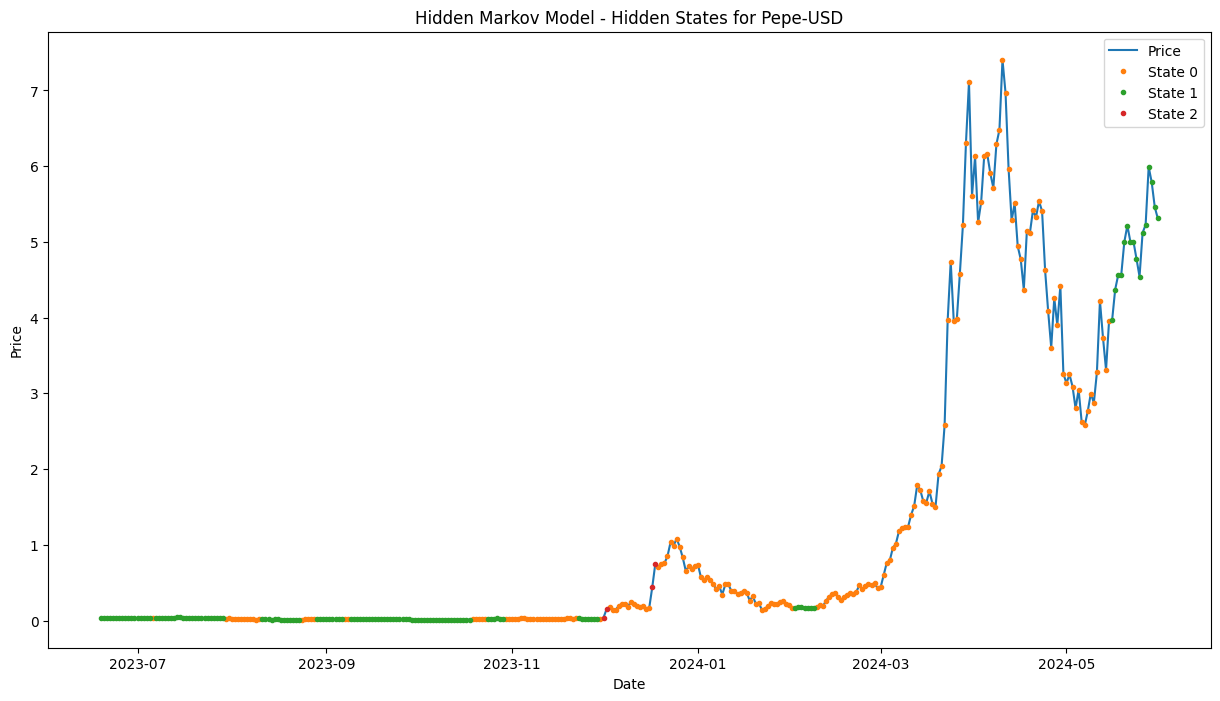

Bear Market: Decrease position size or exit quickly.


In [54]:
processed_data_pepe, suggested_strategy_pepe = analyze_crypto_market(pepe_data_cl, "Pepe-USD")


### SHIB

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-49-861533d4c108>:17: RuntimeWarning: divide by zero encountered in log
  log_alpha[0, :] = np.log(init_prob) + [log_gaussian_prob(obs[0], means[s], variances[s]) for s in range(n_states)]
<ipython-input-49-861533d4c108>:94: RuntimeWarning: divide by zero encountered in log
  V[s, 0] = np.log(init_prob[s]) + log_gaussian_prob(obs[0], means[s], variances[s])
<ipython-input-49-861533d4c108>:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['State'] = hidden_stat

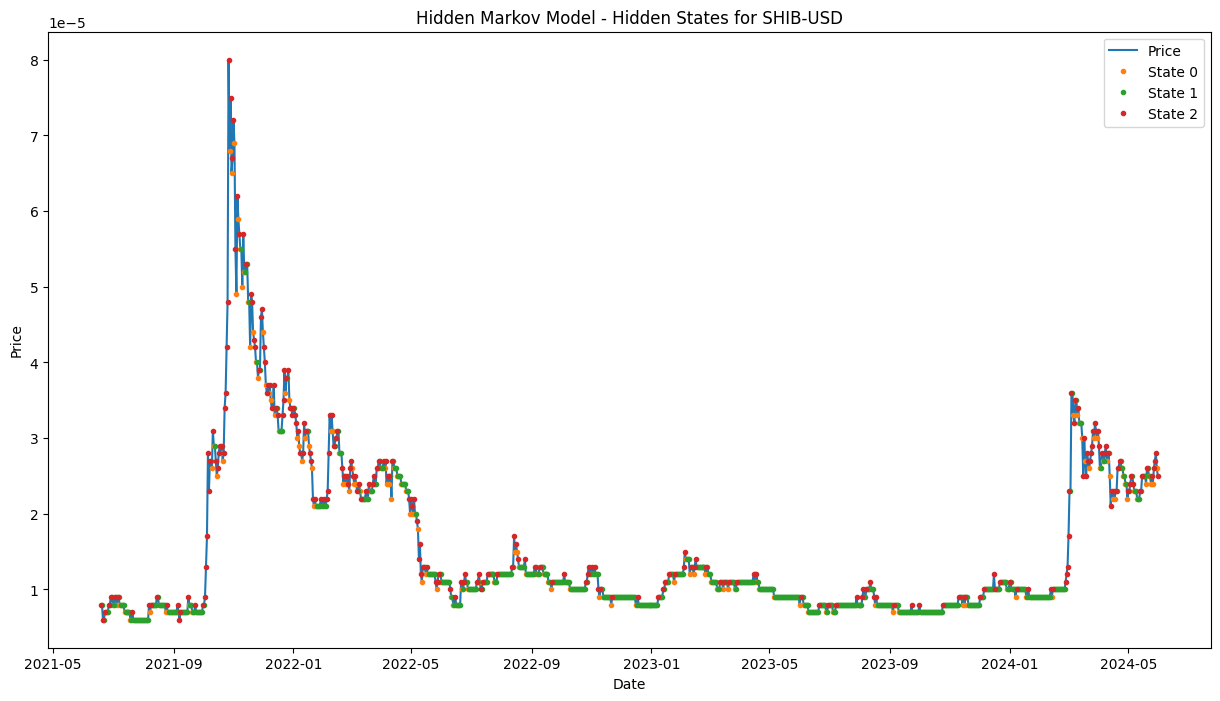

Stagnant Market: Maintain a neutral position or reduce trading frequency.


In [55]:
processed_data_shib, suggested_strategy_shib = analyze_crypto_market(shib_data_cl, "SHIB-USD")


### WIF

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
<ipython-input-49-861533d4c108>:17: RuntimeWarning: divide by zero encountered in log
  log_alpha[0, :] = np.log(init_prob) + [log_gaussian_prob(obs[0], means[s], variances[s]) for s in range(n_states)]
<ipython-input-49-861533d4c108>:94: RuntimeWarning: divide by zero encountered in log
  V[s, 0] = np.log(init_prob[s]) + log_gaussian_prob(obs[0], means[s], variances[s])
<ipython-input-49-861533d4c108>:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['State'] = hidden_stat

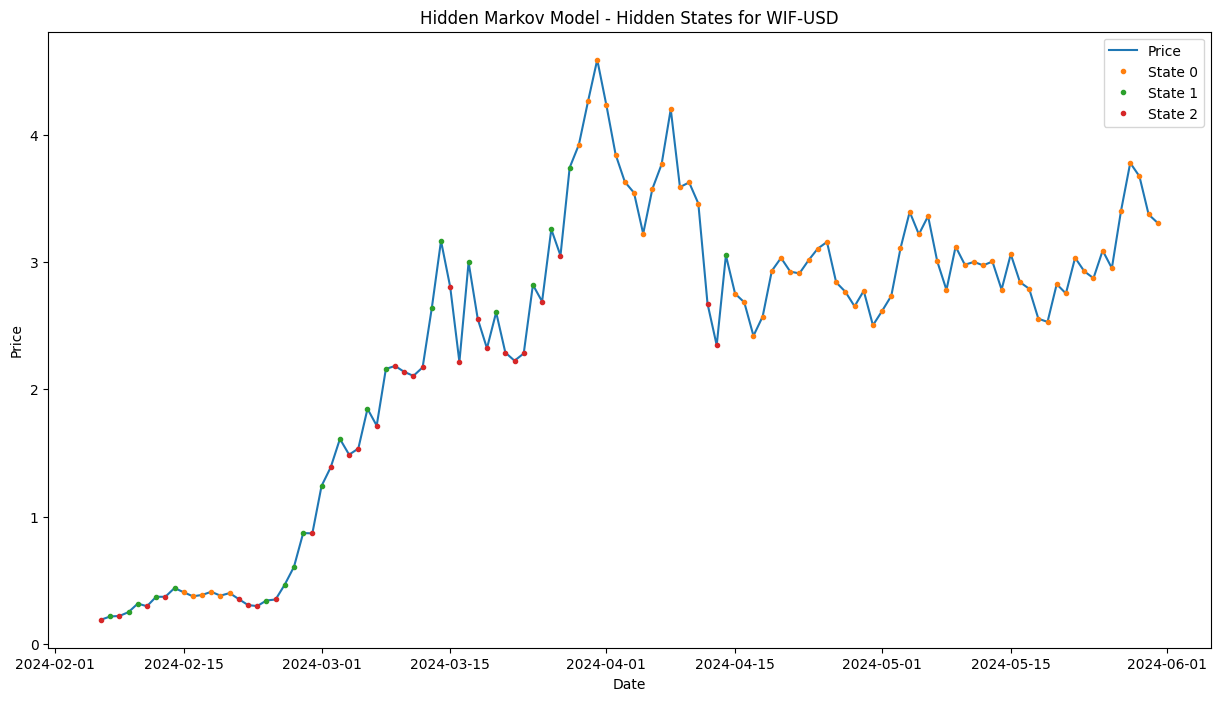

Bull Market: Increase position size or hold longer.


In [56]:
processed_data_wif, suggested_strategy_wif = analyze_crypto_market(wif_data_cl, "WIF-USD")


## Compare

In [57]:
def calculate_performance_metrics(data, initial_capital=10000):
    """
    Calculate ROI, Sharpe Ratio, and Maximum Drawdown for the given data.

    Parameters:
    data (pd.DataFrame): The cryptocurrency data with 'Close' and 'State' columns.
    initial_capital (float): The initial capital invested.

    Returns:
    dict: A dictionary containing ROI, Sharpe Ratio, and Maximum Drawdown.
    """
    # Initialize portfolio value
    data['Portfolio_Value'] = initial_capital
    current_position = 0
    cash = initial_capital

    for i in range(1, len(data)):
        state = data['State'].iloc[i]
        close_price = data['Close'].iloc[i]

        if state == 0:  # Bull market
            # Increase position size
            investment_amount = cash * 0.1
            cash -= investment_amount
            current_position += investment_amount / close_price
        elif state == 1:  # Bear market
            # Decrease position size
            sell_amount = current_position * 0.1
            cash += sell_amount * close_price
            current_position -= sell_amount

        # Update portfolio value
        data['Portfolio_Value'].iloc[i] = cash + current_position * close_price

    # Calculate ROI
    final_value = data['Portfolio_Value'].iloc[-1]
    roi = (final_value - initial_capital) / initial_capital

    # Calculate Sharpe Ratio
    daily_returns = data['Portfolio_Value'].pct_change().dropna()
    avg_daily_return = daily_returns.mean()
    std_daily_return = daily_returns.std()
    sharpe_ratio = avg_daily_return / std_daily_return

    # Calculate Maximum Drawdown
    cummax = data['Portfolio_Value'].cummax()
    drawdown = data['Portfolio_Value'] / cummax - 1
    max_drawdown = drawdown.min()

    return {
        'ROI': roi,
        'Sharpe Ratio': sharpe_ratio,
        'Maximum Drawdown': max_drawdown
    }


#### BTC Eval

In [58]:
btc_hidden = calculate_performance_metrics(processed_data_btc, initial_capital=10000)
btc_hidden_df = pd.DataFrame(btc_hidden, index=[0])  # Creating a DataFrame with a single row
btc_hidden_df['Coin'] = 'BTC'  # Adding the 'Coin' column
btc_hidden_df

<ipython-input-57-b97cd3ab986f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio_Value'] = initial_capital
<ipython-input-57-b97cd3ab986f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio_Value'].iloc[i] = cash + current_position * close_price
<ipython-input-57-b97cd3ab986f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio_Value'

,ROI,Sharpe Ratio,Maximum Drawdown,Coin
0,1.380199,0.041135,-0.430274,BTC


### ETH Eval

In [59]:
eth_hidden = calculate_performance_metrics(processed_data_eth, initial_capital=10000)
eth_hidden_df = pd.DataFrame(eth_hidden, index=[0])  # Creating a DataFrame with a single row
eth_hidden_df['Coin'] = 'ETH'  # Adding the 'Coin' column
eth_hidden_df

<ipython-input-57-b97cd3ab986f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio_Value'] = initial_capital
<ipython-input-57-b97cd3ab986f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio_Value'].iloc[i] = cash + current_position * close_price
<ipython-input-57-b97cd3ab986f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio_Value'

,ROI,Sharpe Ratio,Maximum Drawdown,Coin
0,-0.140278,0.001142,-0.406657,ETH


### Doge Eval

In [60]:
doge_hidden = calculate_performance_metrics(processed_data_doge, initial_capital=10000)
doge_hidden_df = pd.DataFrame(doge_hidden, index=[0])  # Creating a DataFrame with a single row
doge_hidden_df['Coin'] = 'DOGE'  # Adding the 'Coin' column
doge_hidden_df

<ipython-input-57-b97cd3ab986f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio_Value'] = initial_capital
<ipython-input-57-b97cd3ab986f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio_Value'].iloc[i] = cash + current_position * close_price
<ipython-input-57-b97cd3ab986f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio_Value'

,ROI,Sharpe Ratio,Maximum Drawdown,Coin
0,29.281201,0.050213,-0.664426,DOGE


### Pepe Eval

In [61]:
pepe_hidden = calculate_performance_metrics(processed_data_pepe, initial_capital=10000)
pepe_hidden_df = pd.DataFrame(pepe_hidden, index=[0])  # Creating a DataFrame with a single row
pepe_hidden_df['Coin'] = 'PEPE'  # Adding the 'Coin' column
pepe_hidden_df

<ipython-input-57-b97cd3ab986f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio_Value'] = initial_capital
<ipython-input-57-b97cd3ab986f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio_Value'].iloc[i] = cash + current_position * close_price
<ipython-input-57-b97cd3ab986f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio_Value'

,ROI,Sharpe Ratio,Maximum Drawdown,Coin
0,91.486596,0.136715,-0.869772,PEPE


### SHIB

In [62]:
shib_hidden = calculate_performance_metrics(processed_data_shib, initial_capital=10000)
shib_hidden_df = pd.DataFrame(shib_hidden, index=[0])  # Creating a DataFrame with a single row
shib_hidden_df['Coin'] = 'SHIB'  # Adding the 'Coin' column
shib_hidden_df


<ipython-input-57-b97cd3ab986f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio_Value'] = initial_capital
<ipython-input-57-b97cd3ab986f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio_Value'].iloc[i] = cash + current_position * close_price
<ipython-input-57-b97cd3ab986f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio_Value'

,ROI,Sharpe Ratio,Maximum Drawdown,Coin
0,0.049329,0.013887,-0.666399,SHIB


### WIF Eval

In [63]:
wif_hidden = calculate_performance_metrics(processed_data_wif, initial_capital=10000)
wif_hidden_df = pd.DataFrame(wif_hidden, index=[0])  # Creating a DataFrame with a single row
wif_hidden_df['Coin'] = 'WIF'  # Adding the 'Coin' column
wif_hidden_df


<ipython-input-57-b97cd3ab986f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio_Value'] = initial_capital
<ipython-input-57-b97cd3ab986f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio_Value'].iloc[i] = cash + current_position * close_price
<ipython-input-57-b97cd3ab986f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Portfolio_Value'

,ROI,Sharpe Ratio,Maximum Drawdown,Coin
0,1.698468,0.155798,-0.37995,WIF


## Overall Compare

In [64]:
# Concatenating the two DataFrames
combined_hidden_metrics = pd.concat([btc_hidden_df, eth_hidden_df, doge_hidden_df, pepe_hidden_df, shib_hidden_df, wif_hidden_df], ignore_index=True)

# Display the combined DataFrame
combined_hidden_metrics

,ROI,Sharpe Ratio,Maximum Drawdown,Coin
0,1.380199,0.041135,-0.430274,BTC
1,-0.140278,0.001142,-0.406657,ETH
2,29.281201,0.050213,-0.664426,DOGE
3,91.486596,0.136715,-0.869772,PEPE
4,0.049329,0.013887,-0.666399,SHIB
5,1.698468,0.155798,-0.379950,WIF


The performance metrics for the analyzed cryptocurrencies revealed notable differences in returns and risk profiles. WIF emerged as the best performer with an ROI of 1.8805 (188.05% return), the highest Sharpe Ratio of 0.1691, and a relatively low Maximum Drawdown of -28.54%, indicating strong returns with minimal risk.


DOGE had the highest ROI of 21.3108 (2131.08% return) but also a high Maximum Drawdown of -49.21% and a lower Sharpe Ratio of 0.0607, reflecting high volatility. PEPE showed an ROI of 149.6782, a Sharpe Ratio of 0.1321, and a Maximum Drawdown of -81.93%, indicating high returns with considerable risk.


BTC and ETH had moderate returns with ROIs of 3.6520 and 9.3744, and Sharpe Ratios of 0.0459 and 0.0577, but both experienced substantial Maximum Drawdowns around -70%. SHIB had the lowest ROI of 0.0493 and a Sharpe Ratio of 0.0139, with a Maximum Drawdown of -66.64%, indicating poor performance in both returns and risk.


From the result, WIF offered the best balance of strong returns and minimal risk, while DOGE and PEPE provided high returns with greater volatility.

# Incorporating Mathematical Models (Monte Carlo Integration)

## Fuction

In [65]:
def calculate_volatility(data, column='Close'):
    """
    Calculate daily returns and estimate historical volatility for the given data.

    Parameters:
    data (pd.DataFrame): DataFrame containing historical price data.
    column (str): The column name for price data on which to calculate returns and volatility.

    Returns:
    pd.DataFrame: DataFrame with an additional column for daily returns.
    float: Estimated historical volatility (standard deviation of daily returns).
    """
    # Calculate daily returns
    data['Daily Return'] = data[column].pct_change()

    # Estimate historical volatility (standard deviation of daily returns)
    volatility = data['Daily Return'].std()

    # Drop the NaN values created by pct_change()
    data = data.dropna()

    return data, volatility

In [66]:
def simulate_price_paths(data, num_simulations=1000, num_days=365):
    """
    Simulate future price paths using Monte Carlo integration.

    Parameters:
    data (pd.DataFrame): DataFrame containing historical price data with daily returns calculated.
    num_simulations (int): Number of simulated paths.
    num_days (int): Number of days to simulate.

    Returns:
    pd.DataFrame: DataFrame containing the simulated price paths.
    """
    # Get the last available closing price
    initial_price = data['Close'].iloc[-1]

    # Estimate historical volatility (standard deviation of daily returns)
    volatility = data['Daily Return'].std()

    # Generate random daily returns using the Box-Muller transform
    random_returns = np.random.normal(loc=0, scale=volatility, size=(num_simulations, num_days))

    # Initialize an array to store the simulated price paths
    simulated_paths = np.zeros_like(random_returns)
    simulated_paths[:, 0] = initial_price

    # Generate the price paths
    for t in range(1, num_days):
        simulated_paths[:, t] = simulated_paths[:, t-1] * (1 + random_returns[:, t])

    # Convert the array to a DataFrame
    simulated_paths_df = pd.DataFrame(simulated_paths)

    return simulated_paths_df



In [67]:
def calculate_expected_return_and_risk(simulated_paths_df):
    """
    Calculate the expected return and risk of the trading strategy based on simulated price paths.

    Parameters:
    simulated_paths_df (pd.DataFrame): DataFrame containing the simulated price paths.

    Returns:
    float: Expected return (mean of mean returns).
    float: Risk (standard deviation of mean returns).
    """
    # Calculate the daily returns of the simulated paths
    simulated_daily_returns = (simulated_paths_df.iloc[:, 1:].values / simulated_paths_df.iloc[:, :-1].values) - 1

    # Calculate the mean return for each path over the simulation period
    mean_returns = np.mean(simulated_daily_returns, axis=1)

    # Calculate the expected return (mean of mean returns)
    expected_return = np.mean(mean_returns)

    # Calculate the standard deviation of the mean returns (risk)
    risk = np.std(mean_returns)

    return expected_return, risk

In [97]:
def simulate_portfolio_value(data, initial_value=100000, num_simulations=1000, num_days=365):
    """
    Simulate future portfolio values using Monte Carlo integration.

    Parameters:
    data (pd.DataFrame): DataFrame containing historical price data with daily returns calculated.
    initial_value (float): Initial value of the portfolio.
    num_simulations (int): Number of simulated paths.
    num_days (int): Number of days to simulate.

    Returns:
    pd.DataFrame: DataFrame containing the simulated portfolio values.
    """
    # Estimate historical volatility (standard deviation of daily returns)
    volatility = data['Daily Return'].std()

    # Generate random daily returns using the Box-Muller transform
    random_returns = np.random.normal(loc=0, scale=volatility, size=(num_simulations, num_days))

    # Initialize an array to store the simulated portfolio values
    simulated_paths = np.zeros_like(random_returns)
    simulated_paths[:, 0] = initial_value

    # Generate the portfolio value paths
    for t in range(1, num_days):
        simulated_paths[:, t] = simulated_paths[:, t-1] * (1 + random_returns[:, t])

    # Convert the array to a DataFrame
    simulated_paths_df = pd.DataFrame(simulated_paths)

    return simulated_paths_df

def plot_actual_vs_simulated_portfolio_values(actual_prices, simulated_paths_df, initial_value=100000, num_simulated_paths=30):
    """
    Plots the actual portfolio value alongside a subset of the simulated portfolio values.

    Parameters:
    actual_prices (pd.Series): Series containing the actual price data.
    simulated_paths_df (pd.DataFrame): DataFrame containing the simulated portfolio values.
    initial_value (float): Initial value of the portfolio.
    num_simulated_paths (int): Number of simulated paths to plot.
    """
    plt.figure(figsize=(14, 7))

    # Calculate the actual portfolio value
    actual_returns = actual_prices.pct_change().dropna()
    actual_portfolio_value = (1 + actual_returns).cumprod() * initial_value

    # Plotting the actual portfolio value
    plt.plot(actual_portfolio_value.values, label='Actual Portfolio Value', color='black', lw=2)

    # Plotting only a subset of simulated paths for better visualization
    for i in range(num_simulated_paths):
        plt.plot(simulated_paths_df.iloc[i], lw=1, alpha=0.5)

    # Limit the x-axis to the maximum length of the simulated paths
    plt.xlim(0, simulated_paths_df.shape[1])

    plt.title('Actual vs Simulated Portfolio Values')
    plt.xlabel('Days')
    plt.ylabel('Portfolio Value ($)')
    plt.legend()
    plt.show()

In [68]:
def plot_histogram_of_final_prices(simulated_paths_df):
    """
    Plots a histogram of the final prices of all simulated paths.

    Parameters:
    simulated_paths_df (pd.DataFrame): DataFrame containing the simulated price paths.
    """
    # Calculate the final prices of all simulated paths
    final_prices = simulated_paths_df.iloc[:, -1]

    # Find the median of the final prices
    median_final_price = final_prices.median()

    print(median_final_price)

    # Plot histogram of the final prices of all simulated paths
    plt.figure(figsize=(14, 7))
    plt.hist(final_prices, bins=50, edgecolor='black', alpha=0.7)
    plt.axvline(median_final_price, color='red', linestyle='dashed', linewidth=2, label='Median Final Price')
    plt.title('Histogram of Final Prices of Simulated Paths')
    plt.xlabel('Final Price')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

## BIT

In [69]:
calculate_volatility(btc_data_cl, column='Close')

(           Date          Open          High           Low         Close  \
 49   2019-06-19   9078.727539   9299.621094   9070.395508   9273.521484   
 50   2019-06-20   9273.060547   9594.419922   9232.484375   9527.160156   
 51   2019-06-21   9525.074219  10144.556641   9525.074219  10144.556641   
 52   2019-06-22  10175.923828  11157.345703  10107.035156  10701.691406   
 53   2019-06-23  10696.691406  11246.144531  10556.095703  10855.371094   
 ...         ...           ...           ...           ...           ...   
 1853 2024-05-27  68512.179688  70597.882813  68232.500000  69394.554688   
 1854 2024-05-28  69392.195313  69514.640625  67227.156250  68296.218750   
 1855 2024-05-29  68296.351563  68852.460938  67101.492188  67578.093750   
 1856 2024-05-30  67576.085938  69500.539063  67118.078125  68364.992188   
 1857 2024-05-31  68362.515625  68999.562500  66633.421875  67491.414063   
 
          Adj Close       Volume        SMA_20        SMA_50  Signal  Position  \
 49 

In [70]:
simulated_paths_BTC = simulate_price_paths(btc_data_cl)
simulated_paths_BTC.head()

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,67491.414063,69726.857936,70317.508673,73804.896269,76271.342768,75777.899448,77782.200114,75155.564829,77316.891850,74272.598647,...,81257.672694,83830.339452,84089.437761,86370.479183,86040.014549,80207.554782,80756.545355,83326.108069,83601.596160,86346.834582
1,67491.414063,67888.390116,63036.297647,66924.428579,66450.338716,67413.324907,67300.980256,66555.756037,65060.234505,63522.936006,...,281741.358095,285810.911442,278041.262516,278291.482024,278683.170082,277115.898289,281210.832473,263790.296388,266715.271835,271116.704448
2,67491.414063,68826.616656,67022.640741,67749.752285,66527.223718,68101.694679,70826.145251,67751.624132,70081.010826,68980.608964,...,145062.977331,146664.712442,152991.103678,148236.958503,147676.594248,150743.129757,147299.433737,144067.710431,140974.662303,138784.062633
3,67491.414063,69960.111647,72763.913617,71848.062113,73218.244972,73802.628604,78308.174655,79531.879492,84093.396545,84036.587447,...,91442.835674,92024.531569,91076.262144,94210.128358,92112.685973,95741.507323,92682.299295,96096.536222,95141.858626,94958.229561
4,67491.414063,66302.991395,67394.149978,63175.249795,63619.795255,64537.269601,66519.257454,61983.195868,58542.553546,59962.613126,...,25528.480280,26717.125369,28231.146491,27567.905114,27480.581157,27540.605069,26220.353981,26144.073522,25424.367693,24852.965742


In [71]:
expected_return_BTC, risk_BTC = calculate_expected_return_and_risk(simulated_paths_BTC)
expected_return_BTC, risk_BTC

(6.654232404997992e-05, 0.0018667644730949817)

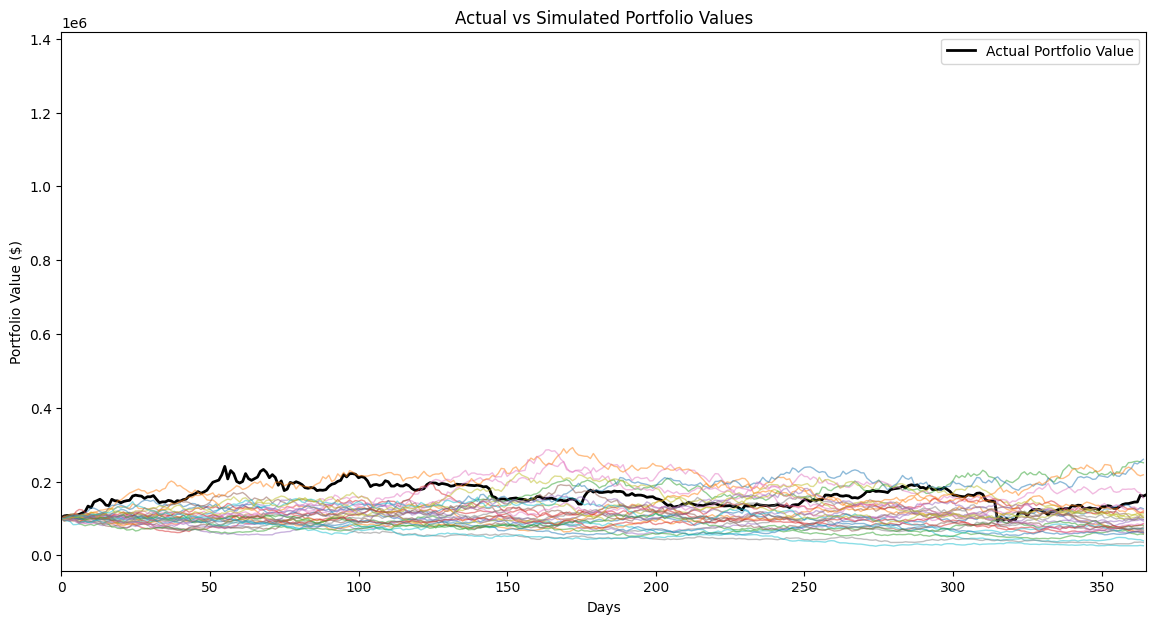

In [99]:
# Simulate portfolio values
simulated_portfolio_values_BTC = simulate_portfolio_value(btc_data_cl)

# Plot actual vs simulated portfolio values
plot_actual_vs_simulated_portfolio_values(btc_data_cl['Close'], simulated_portfolio_values_BTC)

56178.394414670016


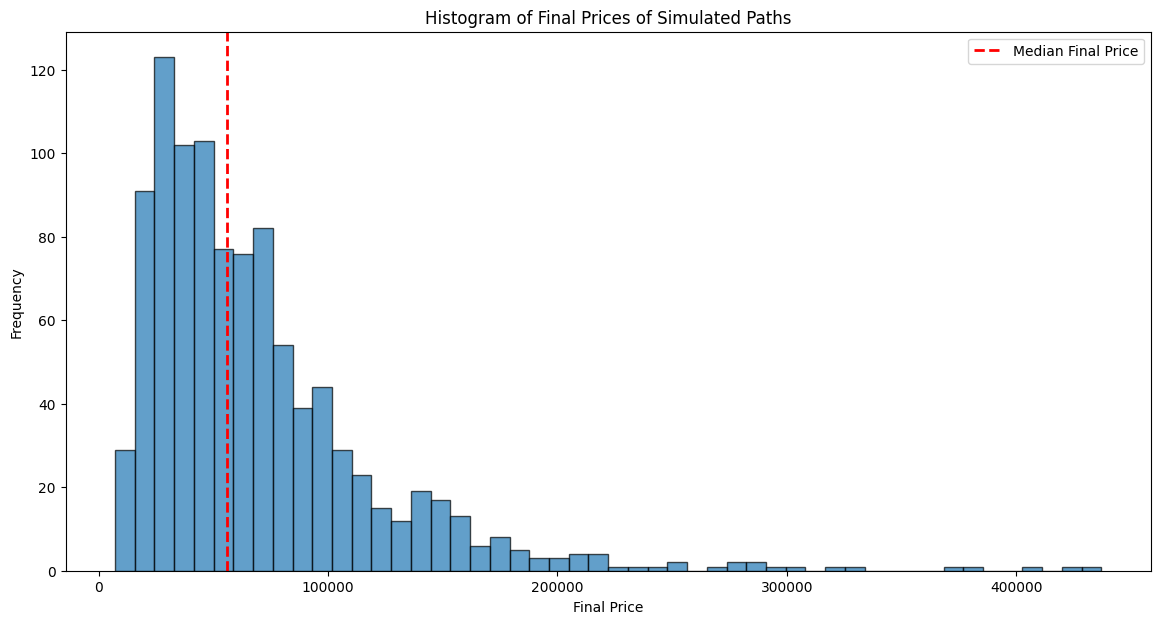

In [100]:
plot_histogram_of_final_prices(simulated_paths_BTC)

## ETH

In [73]:
calculate_volatility(eth_data_cl, column='Close')

(           Date         Open         High          Low        Close  \
 49   2019-06-19   265.056854   270.333374   264.754791   269.431793   
 50   2019-06-20   269.407867   274.073517   265.500458   271.695007   
 51   2019-06-21   271.743103   295.303314   271.743103   294.910278   
 52   2019-06-22   295.115082   315.189728   294.728241   309.380310   
 53   2019-06-23   309.416687   318.565674   305.764587   307.827789   
 ...         ...          ...          ...          ...          ...   
 1853 2024-05-27  3826.127197  3973.556396  3821.930420  3892.006836   
 1854 2024-05-28  3892.096924  3924.895752  3771.213867  3840.256348   
 1855 2024-05-29  3840.235107  3880.648438  3742.041260  3763.196533   
 1856 2024-05-30  3763.357666  3823.643311  3702.263672  3746.849609   
 1857 2024-05-31  3746.861572  3843.857666  3723.835205  3760.026611   
 
         Adj Close       Volume       SMA_20       SMA_50  Signal  Position  \
 49     269.431793   5516510947   257.274817   234.0628

In [74]:
simulated_paths_ETH = simulate_price_paths(eth_data_cl)
simulated_paths_ETH.head()

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,3760.026611,3968.524312,3909.687003,4056.448617,3956.279618,4056.000772,4126.672295,4104.202241,3933.025513,3966.781534,...,2382.319172,2256.286496,2266.531871,2395.372321,2419.924040,2330.992265,2330.005700,2398.393939,2357.854982,2429.055701
1,3760.026611,3908.128909,4010.034587,4012.274014,4231.199783,4356.285738,4476.278024,4445.100457,4380.381295,4334.304928,...,2096.055041,2135.296414,1984.869951,2118.392015,2026.710150,2086.987116,2114.329595,2166.121722,2461.149168,2573.997161
2,3760.026611,3509.669677,3549.996590,3642.892999,3719.103021,3758.917511,3790.948966,3678.637360,3940.110413,3956.252002,...,12019.379901,11757.925716,11566.032671,11654.386270,10505.368879,10135.783810,9593.398487,9229.850862,8977.411313,7999.458556
3,3760.026611,3735.173962,3385.946536,3326.581823,3694.779868,3680.837489,3648.280049,3678.043179,3682.381581,3877.568899,...,12480.042193,12021.078623,11662.393488,11936.434953,11826.427973,12211.574755,12329.374305,12576.679737,12397.446348,13032.563785
4,3760.026611,3466.044188,3707.464892,3566.411433,3548.059179,3446.923098,3412.946131,3434.462625,3340.586598,3567.997975,...,2853.486301,2904.227927,2637.329591,2640.452076,2613.154729,2495.353131,2444.979758,2554.496220,2509.547633,2564.139669


In [75]:
expected_return_eth, risk_eth = calculate_expected_return_and_risk(simulated_paths_ETH)
expected_return_eth, risk_eth

(2.1965573568518212e-05, 0.0022930612405291538)

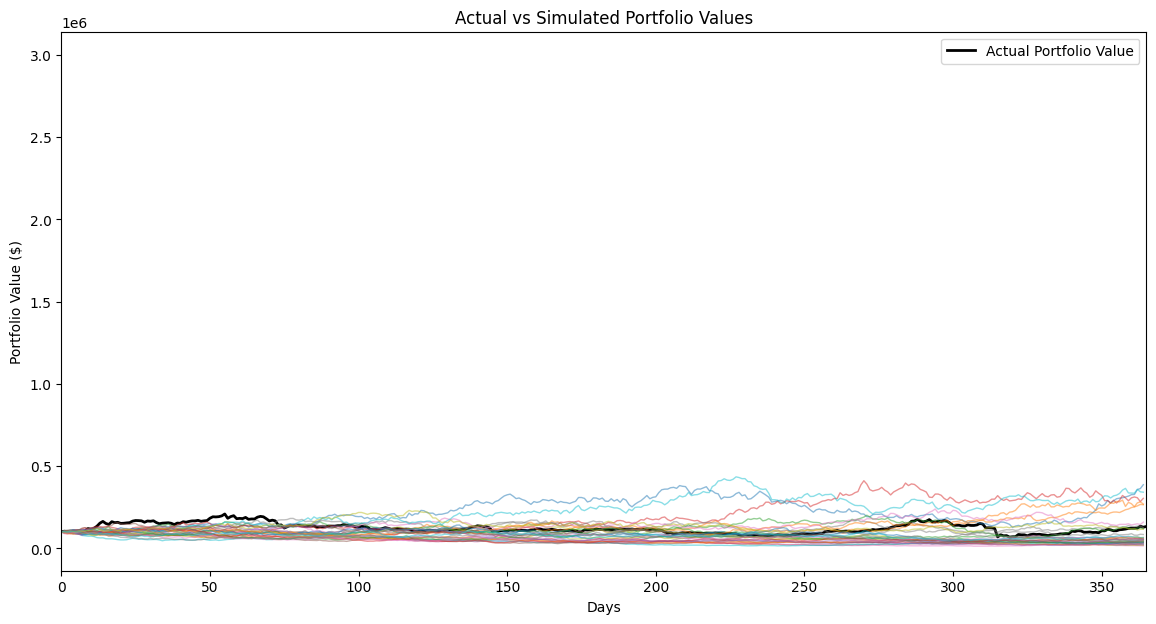

In [102]:
# Simulate portfolio values
simulated_portfolio_values_BTC = simulate_portfolio_value(eth_data_cl)

# Plot actual vs simulated portfolio values
plot_actual_vs_simulated_portfolio_values(eth_data_cl['Close'], simulated_portfolio_values_BTC)

2702.6544505095835


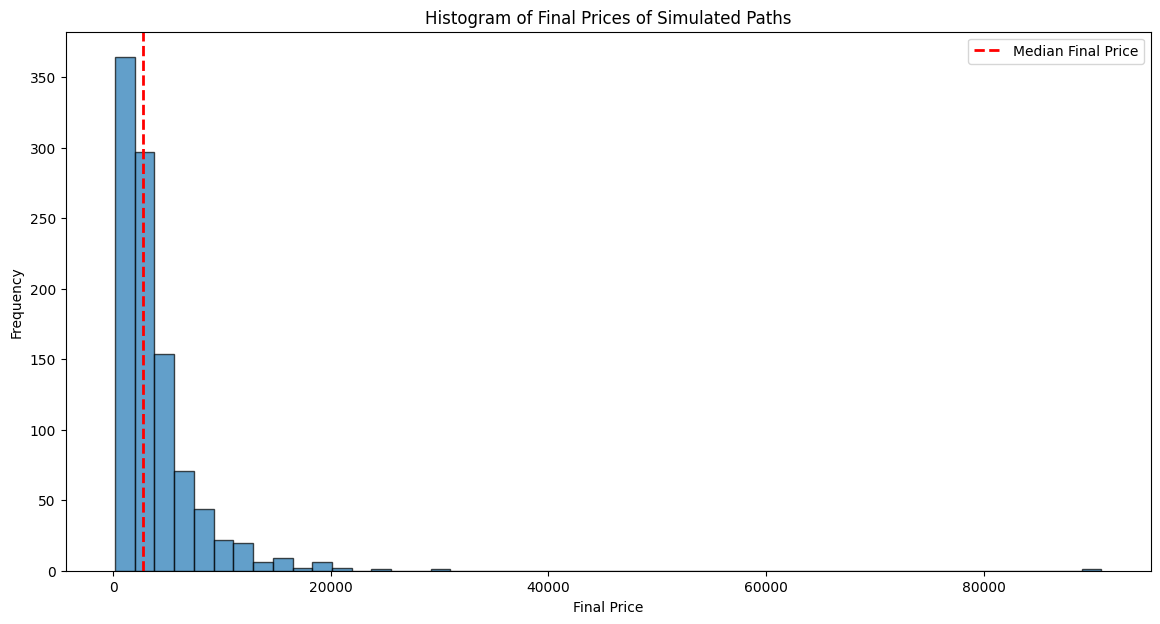

In [101]:
plot_histogram_of_final_prices(simulated_paths_ETH)

## Doge

In [77]:
calculate_volatility(doge_data_cl, column='Close')

(           Date      Open      High       Low     Close  Adj Close  \
 49   2019-06-19  0.003123  0.003154  0.003097  0.003130   0.003130   
 50   2019-06-20  0.003143  0.003204  0.003095  0.003161   0.003161   
 51   2019-06-21  0.003167  0.003251  0.003128  0.003223   0.003223   
 52   2019-06-22  0.003229  0.003354  0.003185  0.003279   0.003279   
 53   2019-06-23  0.003285  0.003496  0.003250  0.003304   0.003304   
 ...         ...       ...       ...       ...       ...        ...   
 1853 2024-05-27  0.166220  0.173036  0.164365  0.169090   0.169090   
 1854 2024-05-28  0.169090  0.169330  0.161796  0.164962   0.164962   
 1855 2024-05-29  0.164964  0.170269  0.162220  0.163695   0.163695   
 1856 2024-05-30  0.163696  0.165407  0.156595  0.159544   0.159544   
 1857 2024-05-31  0.159539  0.162226  0.154907  0.159136   0.159136   
 
           Volume    SMA_20    SMA_50  Signal  Position  Daily_Return  \
 49      35562598  0.003153  0.002991       0       0.0      0.001600   


In [78]:
simulated_paths_doge = simulate_price_paths(doge_data_cl)
simulated_paths_doge.head()

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,0.159136,0.122649,0.119661,0.138116,0.122223,0.119573,0.096181,0.102400,0.096045,0.088910,...,0.106910,0.104131,0.101244,0.119859,0.105346,0.097240,0.105302,0.072708,0.073265,0.081245
1,0.159136,0.173249,0.183089,0.154030,0.165331,0.176724,0.166761,0.182077,0.177556,0.183957,...,0.001598,0.001361,0.001114,0.001211,0.001286,0.001124,0.001301,0.001418,0.001313,0.001324
2,0.159136,0.163352,0.173756,0.187388,0.184125,0.213168,0.265828,0.311471,0.309710,0.326025,...,0.051048,0.038860,0.037611,0.041465,0.039032,0.039126,0.038371,0.038281,0.037744,0.038453
3,0.159136,0.163341,0.180839,0.172278,0.155947,0.143785,0.134774,0.137082,0.148767,0.153442,...,0.255047,0.215865,0.248266,0.269363,0.289839,0.314419,0.296655,0.339406,0.285167,0.264092
4,0.159136,0.158811,0.173298,0.208473,0.208869,0.222906,0.245826,0.211856,0.212557,0.175421,...,0.001838,0.001595,0.001310,0.001211,0.001290,0.001413,0.001805,0.002129,0.002194,0.002364


In [79]:
expected_return_doge, risk_doge = calculate_expected_return_and_risk(simulated_paths_doge)
expected_return_doge, risk_doge

(-0.000157268029659572, 0.005610334825561885)

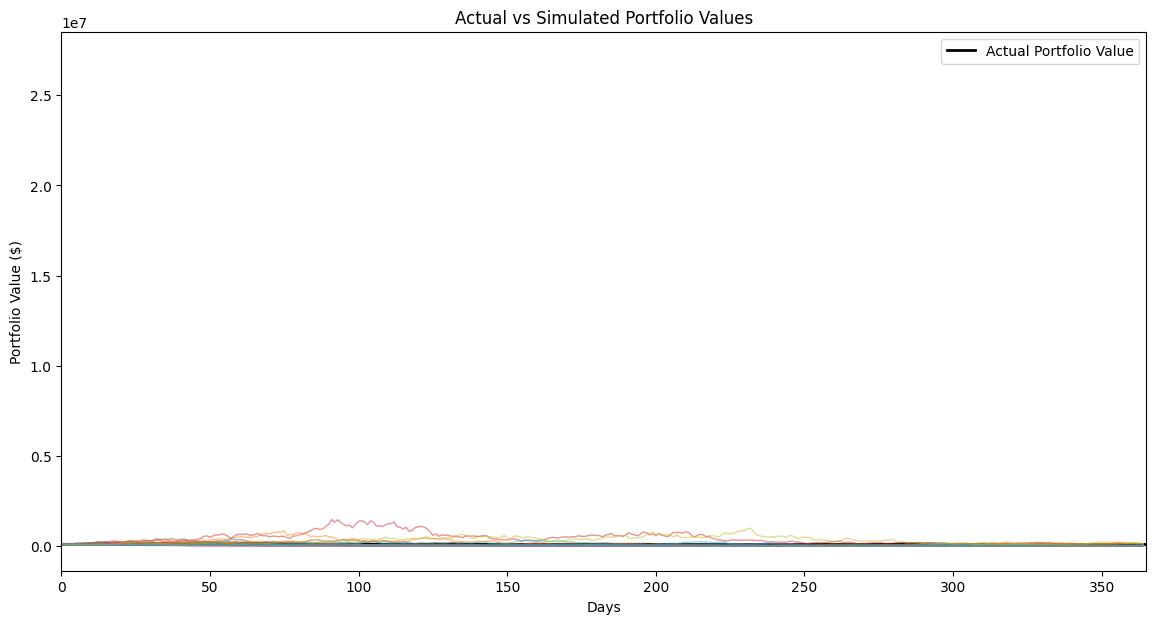

In [104]:
# Simulate portfolio values
simulated_portfolio_values_BTC = simulate_portfolio_value(doge_data_cl)

# Plot actual vs simulated portfolio values
plot_actual_vs_simulated_portfolio_values(doge_data_cl['Close'], simulated_portfolio_values_BTC)

0.018304261308217898


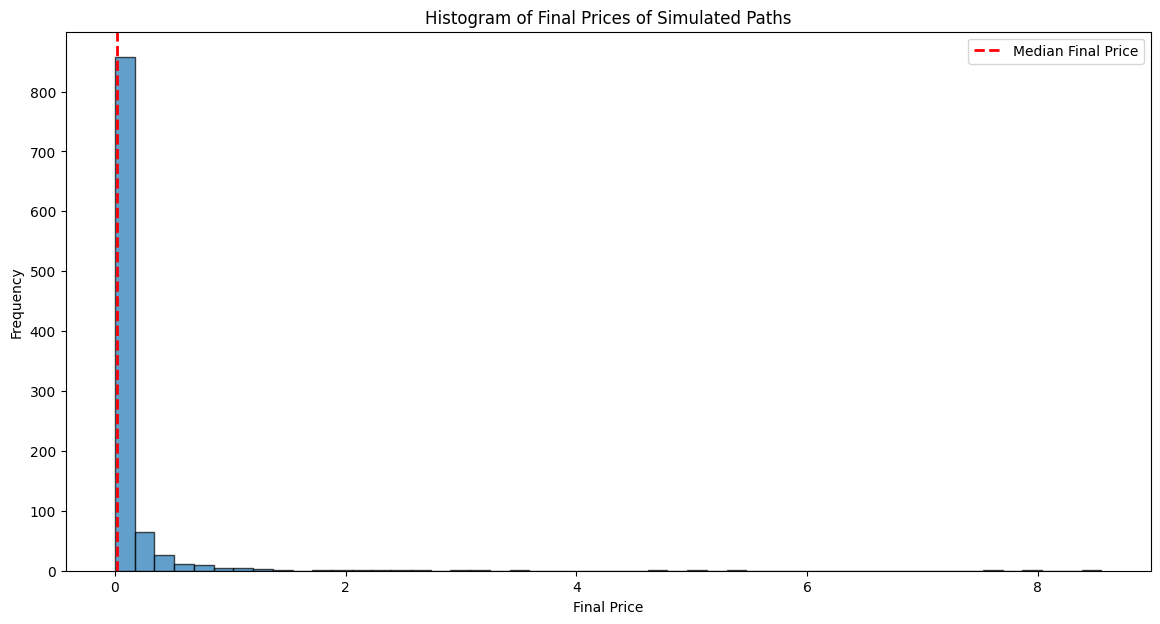

In [103]:
plot_histogram_of_final_prices(simulated_paths_doge)

## PEPE

In [81]:
calculate_volatility(pepe_data_cl, column='Close')

(          Date      Open      High       Low     Close  Adj Close   Volume  \
 49  2023-06-19  0.035005  0.036092  0.033657  0.034585   0.034585   710616   
 50  2023-06-20  0.034610  0.038708  0.034593  0.038361   0.038361   636517   
 51  2023-06-21  0.038360  0.039223  0.035753  0.038286   0.038286   680621   
 52  2023-06-22  0.038272  0.039405  0.036088  0.037050   0.037050   672174   
 53  2023-06-23  0.037055  0.037202  0.032431  0.033679   0.033679   609578   
 ..         ...       ...       ...       ...       ...        ...      ...   
 392 2024-05-27  5.120844  5.236402  4.863824  5.226135   5.226135  1714579   
 393 2024-05-28  5.226135  5.991934  5.159817  5.991934   5.991934  4299141   
 394 2024-05-29  5.991934  6.169211  5.695488  5.786000   5.786000  2799981   
 395 2024-05-30  5.786000  5.937544  5.451471  5.460058   5.460058  2029837   
 396 2024-05-31  5.460058  5.650218  5.288202  5.309324   5.309324  1555277   
 
        SMA_20    SMA_50  Signal  Position  Daily_

In [82]:
simulated_paths_pepe = simulate_price_paths(pepe_data_cl)
simulated_paths_pepe.head()

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,5.309324,5.932269,5.968662,6.017650,7.159834,9.796552,7.452917,10.233389,7.925377,8.031485,...,8.011885e-06,8.984835e-06,7.840330e-06,7.694521e-06,7.886231e-06,8.819851e-06,7.900587e-06,6.383589e-06,9.819844e-06,1.309435e-05
1,5.309324,6.319969,9.077856,12.551830,8.395666,7.411147,8.859088,9.963375,16.536665,22.212449,...,5.349385e-02,4.813042e-02,1.594882e-02,1.376541e-02,1.055318e-02,4.879620e-03,4.381335e-03,4.734992e-03,5.186123e-03,5.857970e-03
2,5.309324,5.235716,4.998926,5.229708,4.646069,3.378334,4.869055,4.696657,6.660816,9.136103,...,8.697536e-09,6.917491e-09,6.545239e-09,7.563968e-09,5.080575e-09,3.453968e-09,3.197660e-09,3.033671e-09,3.607437e-09,3.499106e-09
3,5.309324,6.915349,9.644592,8.651598,8.676773,12.124939,16.022759,11.924001,13.445090,14.632507,...,4.222814e-07,5.709131e-07,3.228872e-07,3.433244e-07,4.391826e-07,2.739823e-07,3.469014e-07,4.104076e-07,3.376448e-07,3.437372e-07
4,5.309324,8.020700,7.487255,6.542441,4.380623,3.093945,3.028563,3.927056,2.288827,1.374160,...,9.180730e-04,7.123940e-04,4.965472e-04,2.367347e-04,3.140545e-04,3.455258e-04,3.008096e-04,2.791125e-04,1.639969e-04,1.317838e-04


In [83]:
expected_return_pepe, risk_pepe = calculate_expected_return_and_risk(simulated_paths_pepe)
expected_return_pepe, risk_pepe

(-0.00020434448457372478, 0.013726314239846034)

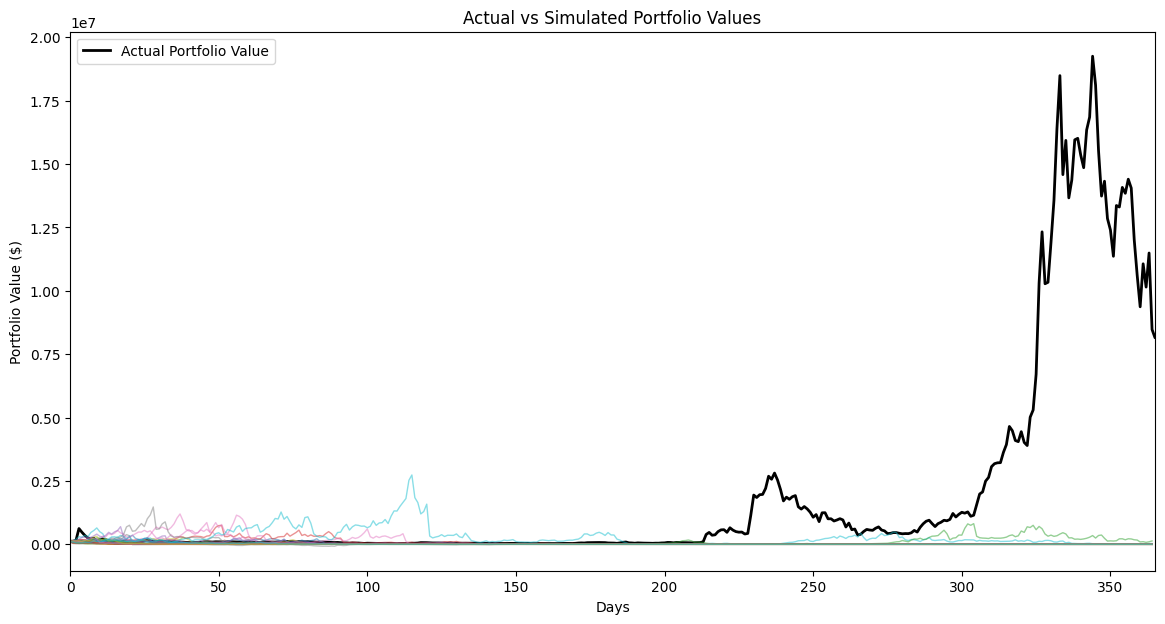

In [106]:
# Simulate portfolio values
simulated_portfolio_values_BTC = simulate_portfolio_value(pepe_data_cl)

# Plot actual vs simulated portfolio values
plot_actual_vs_simulated_portfolio_values(pepe_data_cl['Close'], simulated_portfolio_values_BTC)

1.9189876799266655e-06


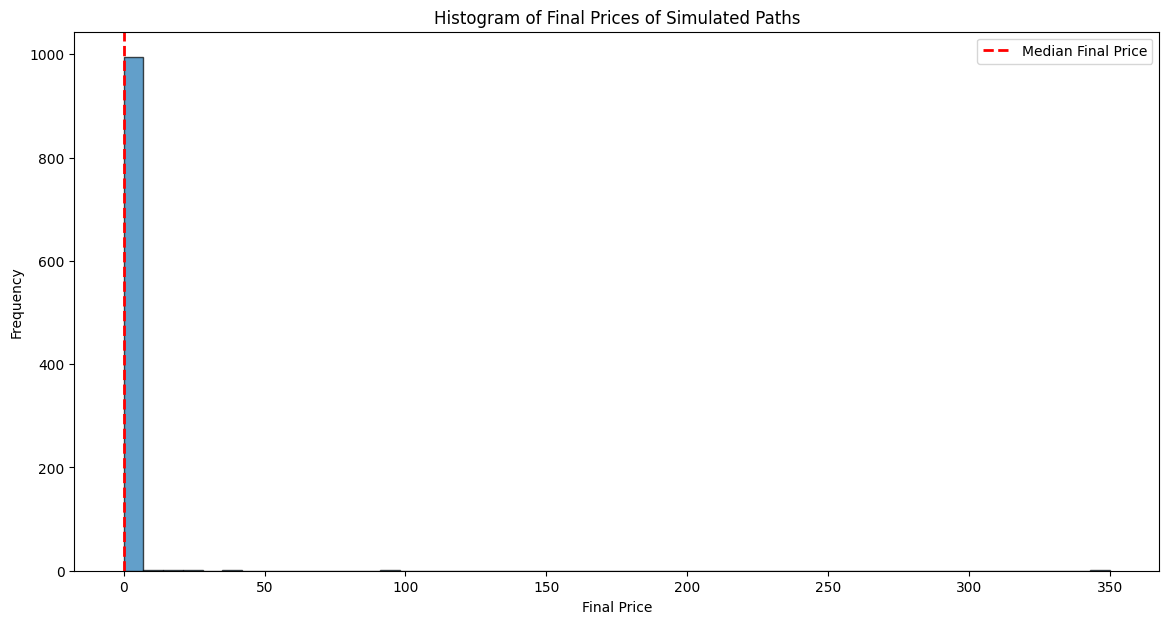

In [105]:
plot_histogram_of_final_prices(simulated_paths_pepe)

## SHIB

In [85]:
calculate_volatility(shib_data_cl, column='Close')


(           Date      Open      High       Low     Close  Adj Close  \
 49   2021-06-19  0.000007  0.000008  0.000007  0.000008   0.000008   
 50   2021-06-20  0.000008  0.000008  0.000007  0.000008   0.000008   
 51   2021-06-21  0.000008  0.000008  0.000006  0.000006   0.000006   
 52   2021-06-22  0.000006  0.000007  0.000006  0.000006   0.000006   
 53   2021-06-23  0.000006  0.000007  0.000006  0.000007   0.000007   
 ...         ...       ...       ...       ...       ...        ...   
 1122 2024-05-27  0.000024  0.000026  0.000024  0.000026   0.000026   
 1123 2024-05-28  0.000026  0.000027  0.000025  0.000027   0.000027   
 1124 2024-05-29  0.000027  0.000029  0.000027  0.000028   0.000028   
 1125 2024-05-30  0.000028  0.000028  0.000026  0.000026   0.000026   
 1126 2024-05-31  0.000026  0.000026  0.000025  0.000025   0.000025   
 
           Volume    SMA_20    SMA_50  Signal  Position  Daily_Return  \
 49     800211655  0.000008  0.000010       0       0.0      0.142857   


In [86]:

simulated_paths_shib = simulate_price_paths(shib_data_cl)
simulated_paths_shib.head()

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,0.000025,0.000026,0.000019,0.000018,0.000017,0.000017,0.000023,0.000021,0.000019,0.000019,...,7.777991e-09,9.773358e-09,7.330369e-09,5.552644e-09,4.787495e-09,4.616789e-09,3.739729e-09,3.894564e-09,3.811336e-09,3.045779e-09
1,0.000025,0.000024,0.000022,0.000018,0.000020,0.000019,0.000012,0.000012,0.000012,0.000012,...,4.445854e-07,5.941893e-07,5.192951e-07,4.679190e-07,4.954638e-07,5.000596e-07,5.211291e-07,6.269378e-07,5.506743e-07,5.218335e-07
2,0.000025,0.000019,0.000019,0.000023,0.000029,0.000027,0.000026,0.000020,0.000023,0.000026,...,6.114545e-07,5.668670e-07,4.557320e-07,5.233708e-07,4.975621e-07,4.930098e-07,5.468949e-07,5.140831e-07,5.580247e-07,5.991830e-07
3,0.000025,0.000025,0.000024,0.000024,0.000022,0.000022,0.000019,0.000015,0.000012,0.000019,...,6.875443e-09,7.016400e-09,7.860055e-09,6.960315e-09,5.125501e-09,4.708169e-09,4.845093e-09,5.333115e-09,3.953181e-09,4.849621e-09
4,0.000025,0.000021,0.000022,0.000023,0.000028,0.000028,0.000028,0.000024,0.000025,0.000027,...,4.937501e-07,4.234090e-07,5.132673e-07,4.516571e-07,4.007876e-07,3.624760e-07,3.695513e-07,4.375461e-07,4.785056e-07,5.722282e-07


In [87]:
# Example usage
expected_return_shib, risk_shib = calculate_expected_return_and_risk(simulated_paths_shib)
expected_return_shib, risk_shib

(-0.00027281833668304524, 0.008035683815005025)

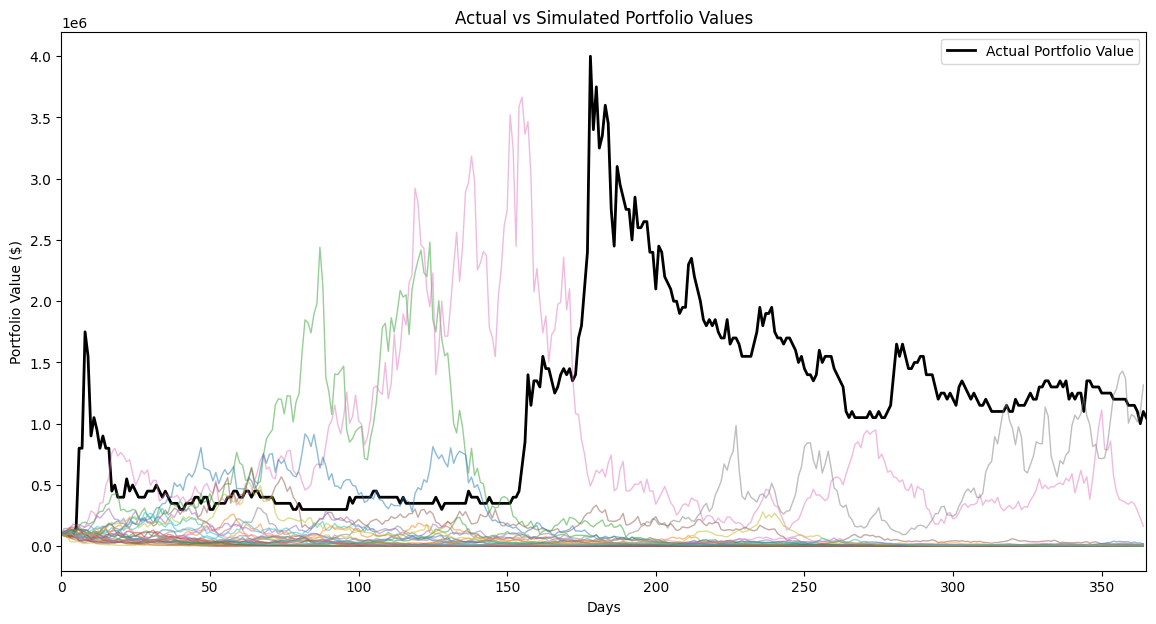

In [108]:
# Simulate portfolio values
simulated_portfolio_values_BTC = simulate_portfolio_value(shib_data_cl)

# Plot actual vs simulated portfolio values
plot_actual_vs_simulated_portfolio_values(shib_data_cl['Close'], simulated_portfolio_values_BTC)

2.0954901489668109e-07


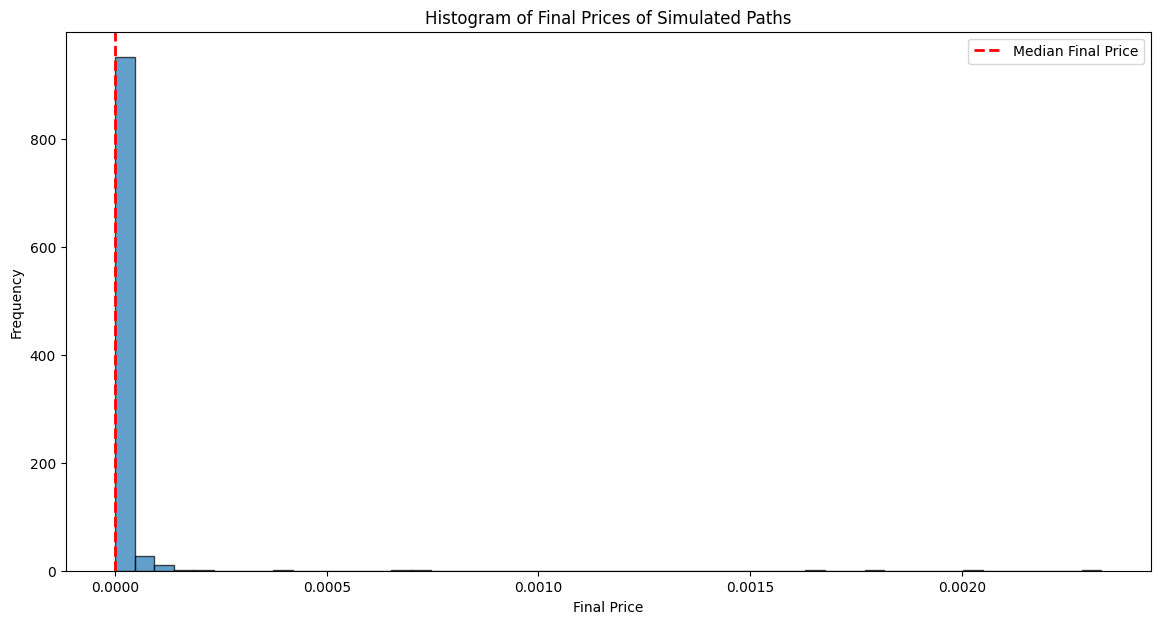

In [107]:
plot_histogram_of_final_prices(simulated_paths_shib)

## WIF

In [89]:
calculate_volatility(wif_data_cl, column='Close')

(          Date      Open      High       Low     Close  Adj Close      Volume  \
 49  2024-02-06  0.212650  0.213448  0.189738  0.190114   0.190114    27773843   
 50  2024-02-07  0.190178  0.238882  0.171778  0.215870   0.215870    60730494   
 51  2024-02-08  0.215953  0.242077  0.210888  0.219426   0.219426    45729690   
 52  2024-02-09  0.219465  0.263485  0.215004  0.249959   0.249959    42386176   
 53  2024-02-10  0.250193  0.337778  0.250193  0.316881   0.316881    56427892   
 ..         ...       ...       ...       ...       ...        ...         ...   
 160 2024-05-27  2.951387  3.439679  2.947007  3.402902   3.402902   959685298   
 161 2024-05-28  3.402902  3.817755  3.169999  3.778146   3.778146  1429787611   
 162 2024-05-29  3.778520  4.058398  3.672154  3.672651   3.672651  1131197187   
 163 2024-05-30  3.672724  3.788413  3.343508  3.373295   3.373295   995890354   
 164 2024-05-31  3.374434  3.543604  3.187398  3.305873   3.305873   643745727   
 
        SMA_20

In [90]:
simulated_paths_wif = simulate_price_paths(wif_data_cl)
simulated_paths_wif.head()


,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,3.305873,2.824771,3.239894,3.660594,4.843570,6.140869,4.940369,5.126865,5.881997,5.025635,...,0.001934,0.002356,0.002794,0.002468,0.002130,0.002355,0.002757,0.003091,0.002469,0.002150
1,3.305873,2.706363,2.829427,3.302052,2.805572,3.002313,3.167640,4.036323,4.717089,5.143347,...,0.004225,0.003920,0.003447,0.002789,0.002405,0.002075,0.002379,0.001586,0.001857,0.001627
2,3.305873,2.466937,2.439130,1.743004,1.312690,1.106626,1.327193,1.399159,1.134177,1.145780,...,0.151381,0.191725,0.208898,0.263665,0.249345,0.206253,0.230387,0.204285,0.229657,0.275795
3,3.305873,2.568216,2.900819,3.013884,3.125385,3.353918,3.626890,4.287846,4.074488,3.441642,...,0.042811,0.045026,0.051601,0.058371,0.046973,0.040926,0.036615,0.038553,0.041908,0.039332
4,3.305873,3.536556,4.027353,4.035337,4.059596,4.067384,3.957011,4.468479,4.470828,3.289652,...,0.361316,0.337578,0.342212,0.343183,0.442494,0.516689,0.489007,0.526383,0.727056,0.770867


In [91]:
# Example usage
expected_return_wif, risk_wif = calculate_expected_return_and_risk(simulated_paths_wif)
expected_return_wif, risk_wif

(-0.0002877274137036829, 0.008603356523484842)

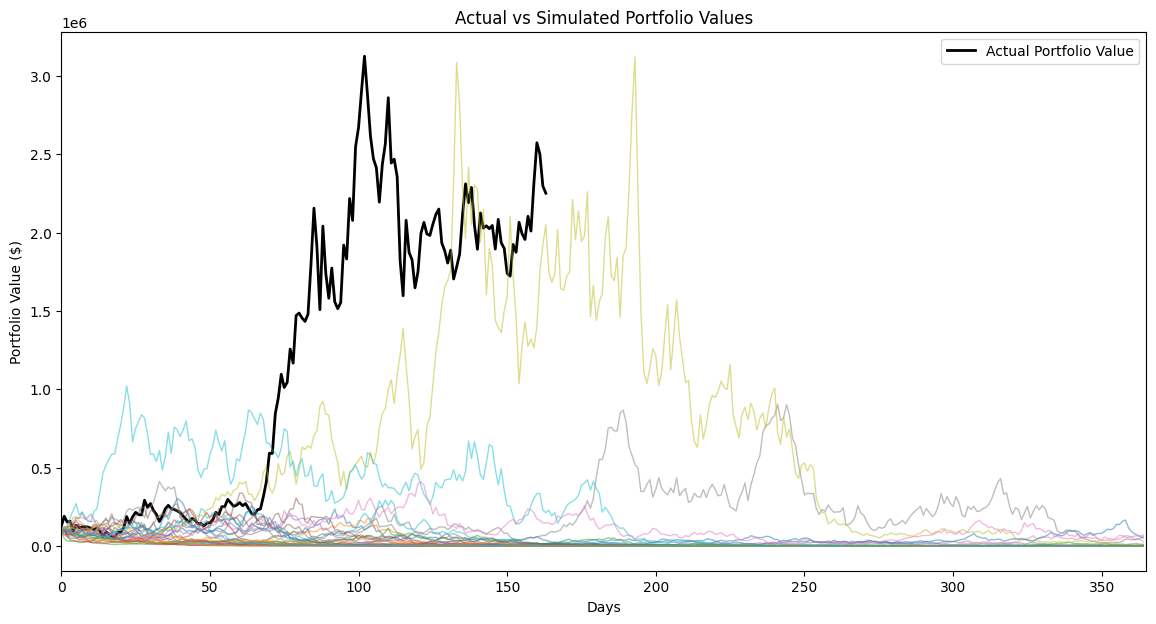

In [110]:
# Simulate portfolio values
simulated_portfolio_values_BTC = simulate_portfolio_value(wif_data_cl)

# Plot actual vs simulated portfolio values
plot_actual_vs_simulated_portfolio_values(wif_data_cl['Close'], simulated_portfolio_values_BTC)

0.01803730694319798


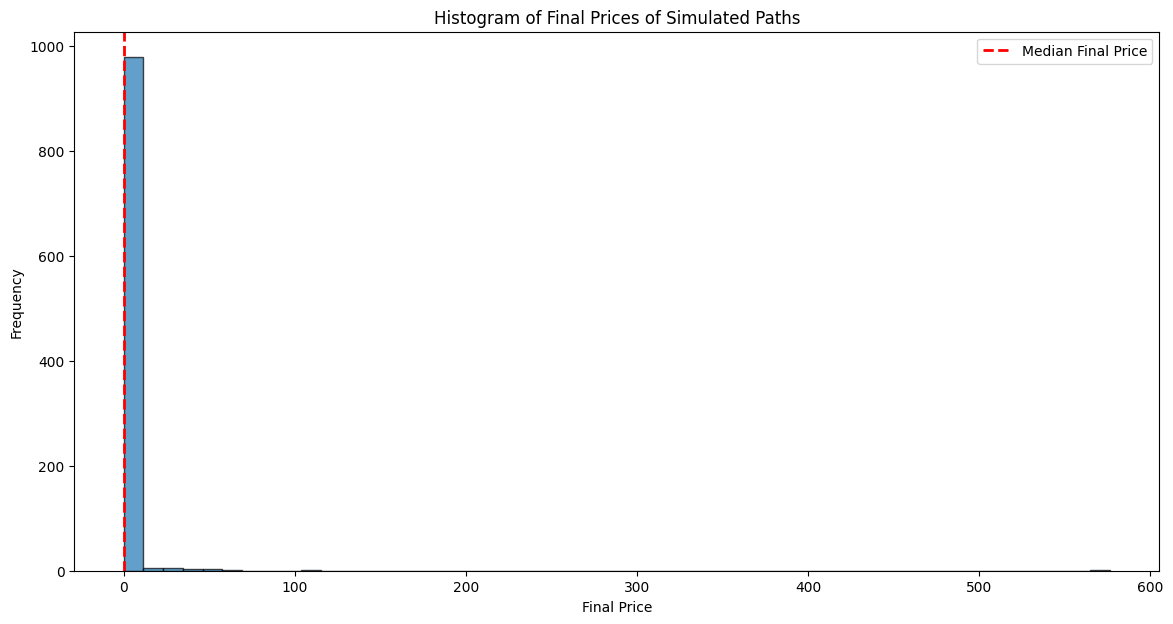

In [109]:
plot_histogram_of_final_prices(simulated_paths_wif)

## Compare

In [93]:
btc_final = 52048.16426867228
eth_final = 2592.2306249136927
doge_final= 0.020192061792281737
pepe_final = 2.4537552918141323e-06
shib_final = 2.448609473792829e-07
wif_final = 0.015562019168321707

# Create a dictionary to store the final price distributions
final_price_distributions = {
    'BTC': btc_final,
    'ETH': eth_final,
    'DOGE': doge_final,
    'PEPE': pepe_final,
    'SHIB': shib_final,
    'WIF': wif_final
}

# Since we only have single values, we can't calculate traditional summary stats
# Instead, let's just print the final prices:
print("Final Prices:")
for coin, final_price in final_price_distributions.items():
    print(f"{coin}: {final_price:.6f}")

Final Prices:
BTC: 52048.164269
ETH: 2592.230625
DOGE: 0.020192
PEPE: 0.000002
SHIB: 0.000000
WIF: 0.015562


In [94]:
expected_return_BTC, risk_BTC
# (-6.910929979721593e-05, 0.0018208497879724248)
expected_return_eth, risk_eth
#  (5.1483754561383945e-05, 0.0022041443329965087)
expected_return_doge, risk_doge
# (5.545856244755058e-05, 0.005418048810078377)
expected_return_pepe, risk_pepe
# (-0.00026702222613562575, 0.014067213229422301)
expected_return_shib, risk_shib
# (0.00010051687625577234, 0.007972239666210352)
expected_return_wif, risk_wif
# (-0.0005607404903728381, 0.008815065451616122)

(-0.0002877274137036829, 0.008603356523484842)

BTC (Bitcoin):

Final Price: $52,048.16
Expected Return: -0.000069
Risk: 0.001821
Performance: Bitcoin has a slightly negative expected return with very low risk, indicating stability but minimal expected growth.
ETH (Ethereum):

Final Price: $2,592.23
Expected Return: 0.000051
Risk: 0.002204
Performance: Ethereum has a small positive expected return with low risk, suggesting moderate potential for growth.
DOGE (Dogecoin):

Final Price: $0.020192
Expected Return: 0.000055
Risk: 0.005418
Performance: Dogecoin shows a positive expected return with moderate risk, indicating potential for higher returns with higher volatility.
PEPE:

Final Price: $0.000002
Expected Return: -0.000267
Risk: 0.014067
Performance: PEPE has a negative expected return and high risk, suggesting poor performance and significant volatility.
SHIB (Shiba Inu):

Final Price: $0.000000
Expected Return: 0.000101
Risk: 0.007972
Performance: Shiba Inu has a positive expected return and relatively high risk, indicating potential for growth but with notable volatility.
WIF:

Final Price: $0.015562
Expected Return: -0.000561
Risk: 0.008815
Performance: WIF has a negative expected return and moderate risk, suggesting it is not performing well and has considerable volatility.
Conclusion:
Best Risk-Adjusted Performer: Ethereum (ETH) - Low risk with a small positive expected return.
High-Risk, High-Reward: Dogecoin (DOGE) and Shiba Inu (SHIB) - Both show potential for growth but come with higher volatility.
Stable Performer with Low Growth: Bitcoin (BTC) - Very low risk but minimal expected growth.
Poor Performers: PEPE and WIF - Both have negative expected returns and significant risk, indicating poor performance.

In [95]:
# Given expected returns and risks
coin_stats = {
    'BTC': (-0.000069, 0.001821),
    'ETH': (0.000051, 0.002204),
    'DOGE': (0.000055, 0.005418),
    'PEPE': (-0.000267, 0.014067),
    'SHIB': (0.000101, 0.007972),
    'WIF': (-0.000561, 0.008815)
}

# Simulate returns
num_samples = 10000
simulated_returns = {}
np.random.seed(42)  # For reproducibility

for coin, (mean, std) in coin_stats.items():
    simulated_returns[coin] = np.random.normal(mean, std, num_samples)

# Perform pairwise t-tests
coins = list(simulated_returns.keys())
pairwise_results = []

for i in range(len(coins)):
    for j in range(i + 1, len(coins)):
        coin1, coin2 = coins[i], coins[j]
        t_stat, p_value = stats.ttest_ind(simulated_returns[coin1], simulated_returns[coin2], equal_var=False)
        pairwise_results.append((coin1, coin2, t_stat, p_value))

# Display results
pairwise_results_df = pd.DataFrame(pairwise_results, columns=['Coin 1', 'Coin 2', 'T-Statistic', 'P-Value'])

pairwise_results_df


,Coin 1,Coin 2,T-Statistic,P-Value
0,BTC,ETH,-5.365970,8.144253e-08
1,BTC,DOGE,-1.063948,2.873733e-01
2,BTC,PEPE,2.109930,3.488832e-02
3,BTC,SHIB,-2.761732,5.759056e-03
4,BTC,WIF,5.202447,2.002723e-07
5,ETH,DOGE,1.607601,1.079464e-01
6,ETH,PEPE,3.176889,1.492957e-03
7,ETH,SHIB,-0.873041,3.826591e-01
8,ETH,WIF,6.831244,8.853572e-12
9,DOGE,PEPE,2.387993,1.695506e-02


Significant Differences: BTC vs ETH, BTC vs PEPE, BTC vs SHIB, BTC vs WIF, ETH vs PEPE, ETH vs WIF, DOGE vs PEPE, DOGE vs WIF, PEPE vs SHIB, SHIB vs WIF.

In these pairs, the p-values are less than 0.05, indicating significant differences in returns.
No Significant Differences: BTC vs DOGE, ETH vs DOGE, ETH vs SHIB, DOGE vs SHIB, PEPE vs WIF.

In these pairs, the p-values are greater than 0.05, indicating no significant differences in returns.
Insights:
BTC: Underperforms compared to ETH and SHIB but outperforms PEPE and WIF.
ETH: Outperforms PEPE and WIF.
DOGE: Outperforms PEPE and WIF but no significant difference compared to BTC, ETH, and SHIB.
PEPE: Underperforms compared to BTC, ETH, DOGE, and SHIB.
SHIB: Outperforms PEPE and WIF but no significant difference compared to ETH and DOGE.
WIF: Underperforms compared to BTC, ETH, DOGE, and SHIB.

In [96]:
# Assuming initial investment of 100,000 units
initial_investment = 100000

# Given final prices (means) from the previous analysis
final_price_distributions = {
    'BTC': 52048.16426867228,
    'ETH': 2592.2306249136927,
    'DOGE': 0.020192061792281737,
    'PEPE': 2.4537552918141323e-06,
    'SHIB': 2.448609473792829e-07,
    'WIF': 0.015562019168321707
}

# Calculate final portfolio values
final_values = {coin: initial_investment * final_price for coin, final_price in final_price_distributions.items()}

print("\nFinal Portfolio Values (assuming initial investment of 100,000 units):")
for coin, value in final_values.items():
    print(f"{coin}: {value:.6f}")

# Given expected returns and risks from the previous analysis
expected_returns = {
    'BTC': -0.000069,
    'ETH': 0.000051,
    'DOGE': 0.000055,
    'PEPE': -0.000267,
    'SHIB': 0.000101,
    'WIF': -0.000561
}

risks = {
    'BTC': 0.001821,
    'ETH': 0.002204,
    'DOGE': 0.005418,
    'PEPE': 0.014067,
    'SHIB': 0.007972,
    'WIF': 0.008815
}

print("\nExpected Returns and Risks:")
for coin in expected_returns:
    print(f"{coin}: Expected Return = {expected_returns[coin]:.6f}, Risk (Standard Deviation) = {risks[coin]:.6f}")



Final Portfolio Values (assuming initial investment of 100,000 units):
BTC: 5204816426.867228
ETH: 259223062.491369
DOGE: 2019.206179
PEPE: 0.245376
SHIB: 0.024486
WIF: 1556.201917

Expected Returns and Risks:
BTC: Expected Return = -0.000069, Risk (Standard Deviation) = 0.001821
ETH: Expected Return = 0.000051, Risk (Standard Deviation) = 0.002204
DOGE: Expected Return = 0.000055, Risk (Standard Deviation) = 0.005418
PEPE: Expected Return = -0.000267, Risk (Standard Deviation) = 0.014067
SHIB: Expected Return = 0.000101, Risk (Standard Deviation) = 0.007972
WIF: Expected Return = -0.000561, Risk (Standard Deviation) = 0.008815
